[![General Assembly Logo](https://camo.githubusercontent.com/1a91b05b8f4d44b5bbfb83abac2b0996d8e26c92/687474703a2f2f692e696d6775722e636f6d2f6b6538555354712e706e67)](https://generalassemb.ly/education/web-development-immersive)
![Misk Logo](https://i.ibb.co/KmXhJbm/Webp-net-resizeimage-1.png)

# Project_4 ___ Predicting the Microsoft Stock Market Using Time-Series Models; namely, Arima, Recurrent Neural Network (RNN) and FaceBook Prophet Models



**Team Members:** Abdulaziz Awadh Allah Alsulami - Ibrahim Rizqallah Alzahrani

---

# Problem Statement

#### We aim to examine the best prediction model that we would be to use in predicting future stockmmarket (In our task, predicting the Microsoft stock market for ahead three months).

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 866 kB/s 
     |████████████████████████████████| 2.1 MB 7.8 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading autocorrelation ACF,PACF,plots, and seasonal decompose

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima


In [3]:
# reading data as dataframe
df = pd.read_csv('../input/microsoft-stock-market-2001-2021/MSFT_Stock.csv', index_col=0)

In [4]:
# displaying 1st five rows
df.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [5]:
# displaying number of rows and columns
df.shape

(5000, 5)

In [6]:
# displaying names, count of rows, number of null values and data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2001-03-16 to 2021-01-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5000 non-null   float64
 1   high    5000 non-null   float64
 2   low     5000 non-null   float64
 3   close   5000 non-null   float64
 4   volume  5000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 234.4+ KB


In [7]:
# displaying statistics information
df.describe()

,open,high,low,close,volume
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,50.914019,51.427929,50.392397,50.926300,5.258910e+07
std,44.813384,45.288441,44.304027,44.823724,3.032694e+07
min,15.200000,15.620000,14.870000,15.150000,1.123154e+06
25%,26.590000,26.860000,26.300000,26.578750,3.081450e+07
50%,29.910000,30.155000,29.655000,29.920000,4.839215e+07
75%,52.245000,52.692500,51.607500,52.162500,6.596215e+07
max,238.000000,242.640000,235.090000,238.929990,5.910522e+08


We can see the first four features have nearly same value of mean, std, min, percentil range except max value.

In [8]:
# resorting data frame as ascending according to date
# displaying 1st five rows
df.sort_index(inplace=True)
df.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [9]:
# displaying last five rows
df.tail()

,open,high,low,close,volume
2021-01-25,229.12000,229.78000,224.22,229.53000,33152095
2021-01-26,231.86000,234.17999,230.08,232.33000,48699200
2021-01-27,238.00000,240.44000,230.14,232.89999,69757500
2021-01-28,235.61000,242.64000,235.09,238.92999,48990000
2021-01-29,235.99001,238.01500,231.36,231.96001,40004239


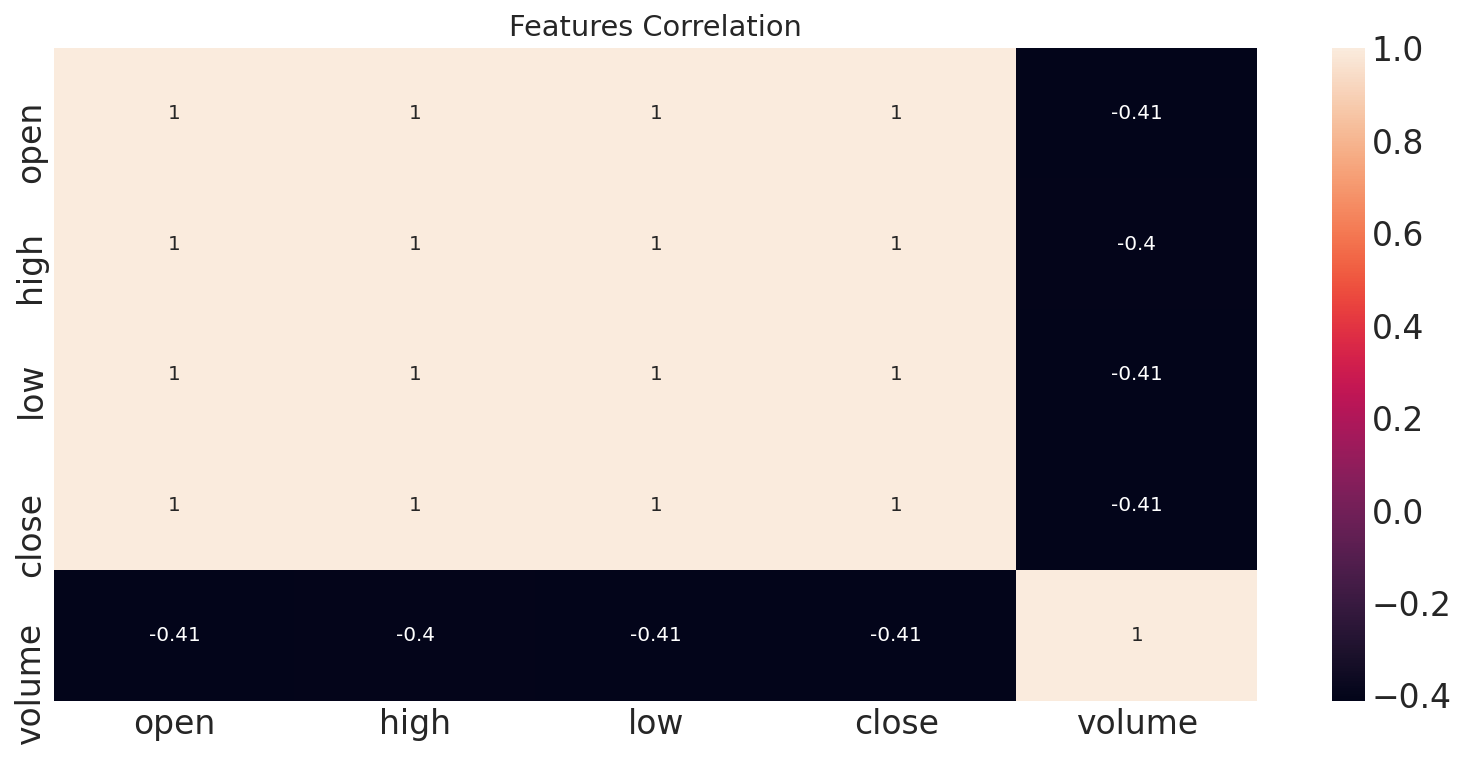

In [10]:
# plotting and displaying corrlation of features with values
plt.figure(figsize=(12,6))
sns.heatmap(
    df.corr(), 
    annot=True,
    )
plt.title('Features Correlation');

# Each feature has a perfect positive correlation with other features excpet volume has a low negative corrlation with other features

** bold textMinimum and Maximum value of all features**

In [11]:
# creating for loop to print the minimum stock price for each feature and number of stocks with date
for col in df.columns:
    min_val = df[col].min()
    print(df[df[col] == df[col].min()][col])
    print()

2009-03-09    15.2
Name: open, dtype: float64

2009-03-06    15.62
Name: high, dtype: float64

2009-03-06    14.87
Name: low, dtype: float64

2009-03-09    15.15
Name: close, dtype: float64

2020-07-08    1123154
Name: volume, dtype: int64



# In Mach 2009 all stock prices dropped at the low level except stock volume were at the low level in July 2020.

In [12]:
# creating for loop to print the minimum stock price for each feature and number of stocks with date
for col in df.columns:
    max_val = df[col].max()
    print(df[df[col] == df[col].max()][col])
    print()

2021-01-27    238.0
Name: open, dtype: float64

2021-01-28    242.64
Name: high, dtype: float64

2021-01-28    235.09
Name: low, dtype: float64

2021-01-28    238.92999
Name: close, dtype: float64

2006-04-28    591052200
Name: volume, dtype: int64



# In January 2021 all stock prices rocket jump at the high level except sotck volume were at the high level in April 2006.

### EDA

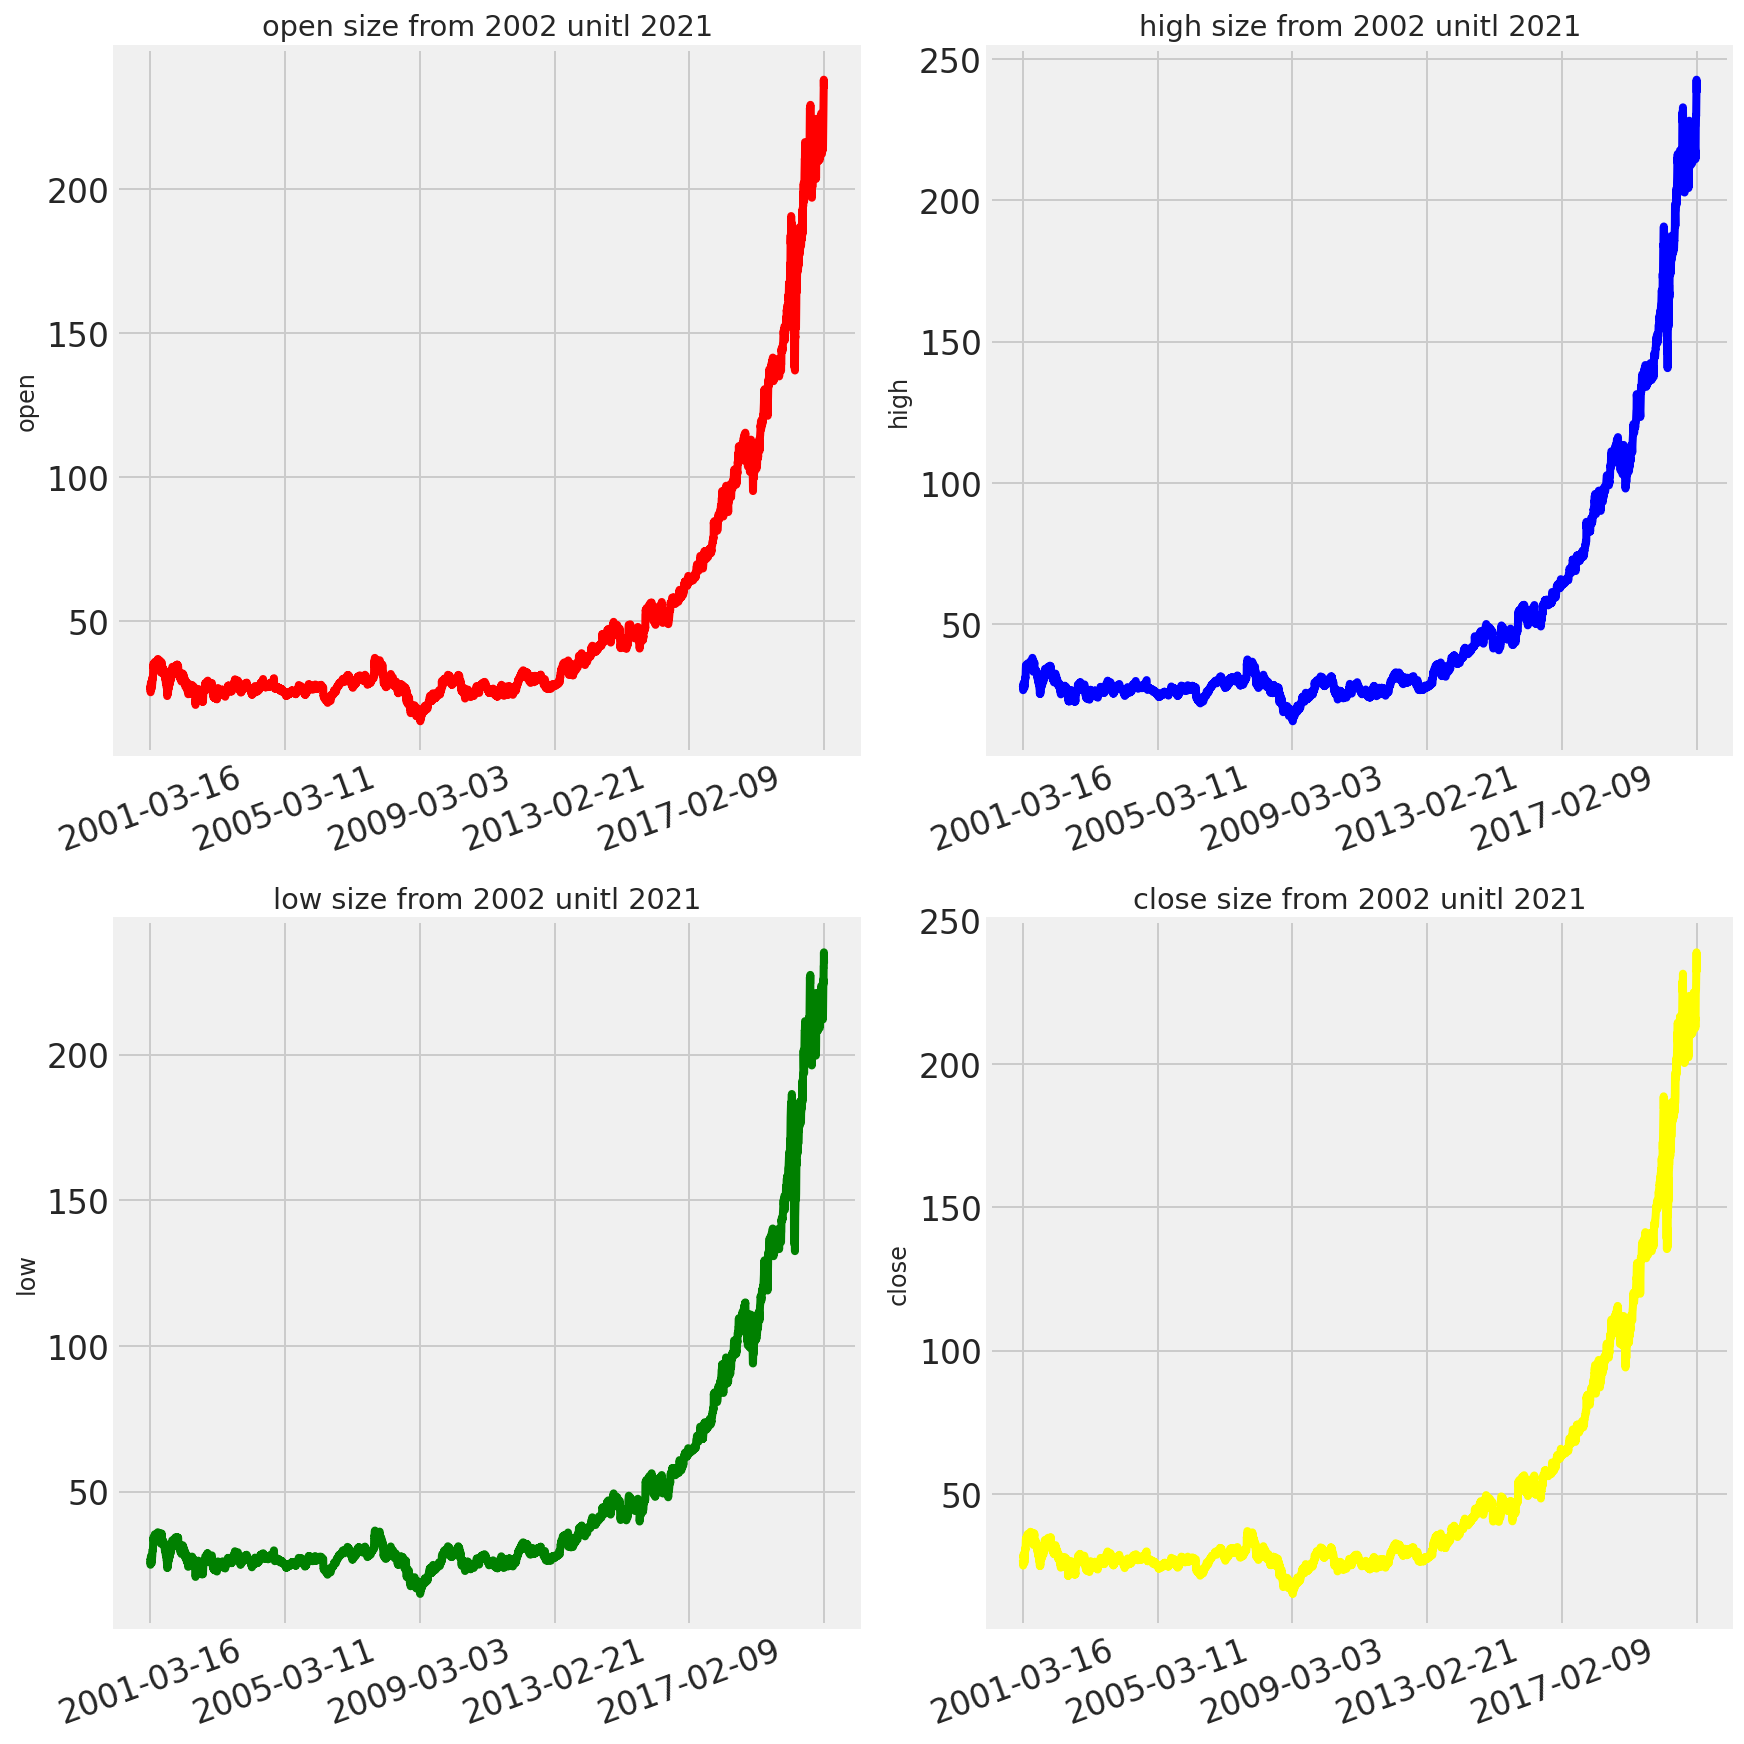

In [13]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), constrained_layout=True) 
ax = ax.ravel()

colors = ['red', 'blue', 'green', 'yellow']
cols = [col for col in df.columns if col != 'volume']

for i in range(len(cols)):
    df.iloc[:,i].plot(ax=ax[i], color=colors[i], )
    ax[i].set(ylabel=cols[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)
    ax[i].set_title(f'{cols[i]} size from 2002 unitl 2021');

# We can see after 2016, there was a rocket jump in stock prices for all features. Befor 2016 most stock prices were less than 50, in 2009 stock prices were at the low level.

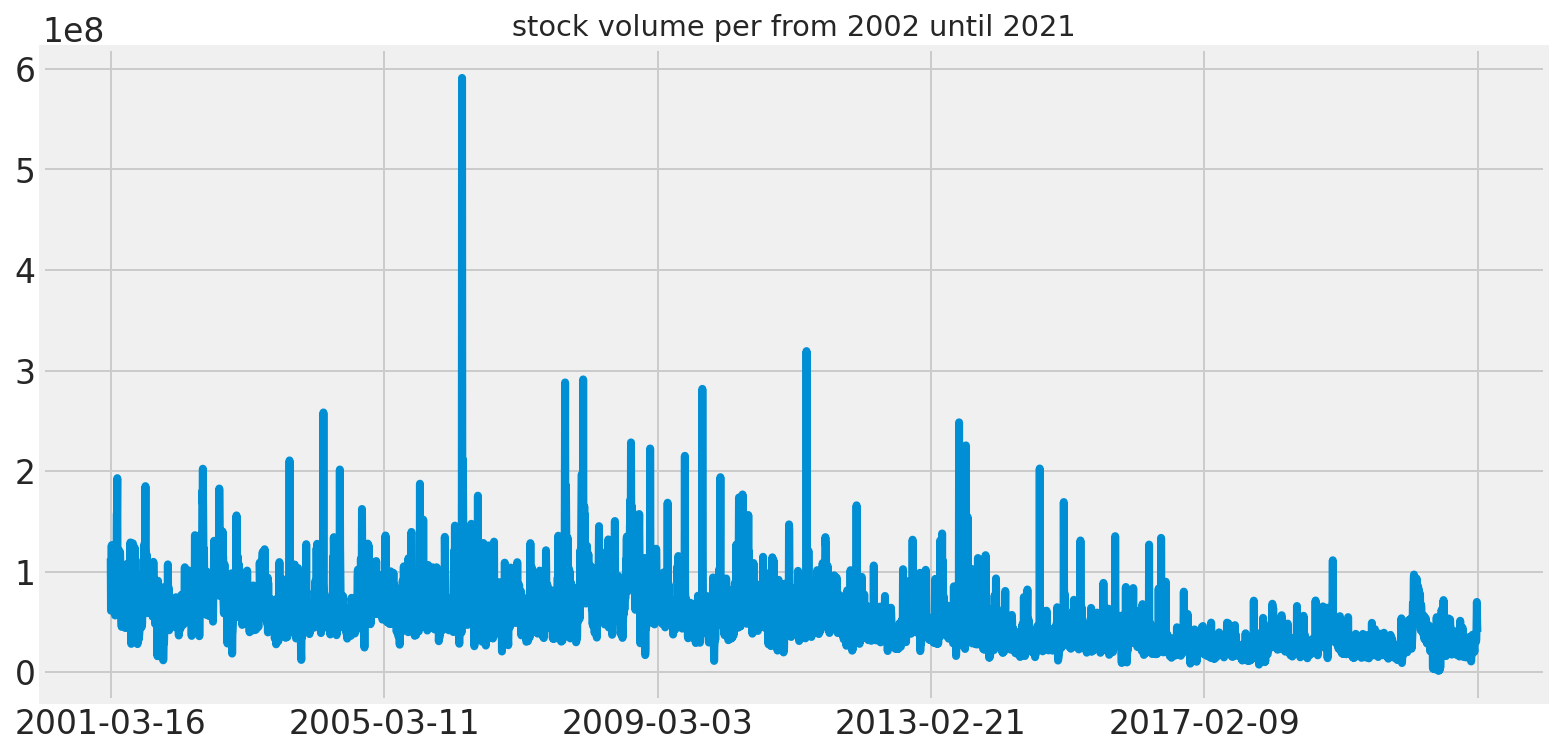

In [14]:
plt.figure(figsize=(12,6))
df.iloc[:,-1].plot()
plt.title('stock volume per from 2002 until 2021');

# We can see stocks volume were less than half 300 Million even 2006, then it will jump at the high level to reach around 600 Million then dropped and still at same level less than 300 Milliion 

### Model
**Autoregressive Integrated Moving Average aka ARIMA**

ARIMA, or Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average.


In [15]:
# converting index (date) to date time type
df.index = pd.to_datetime(df.index)
df.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [16]:
# resampling to 4 Quarter (season)
df.resample('Q').mean().head()

,open,high,low,close,volume
2001-03-31,27.318182,28.110795,26.732245,27.369318,9.379107e+07
2001-06-30,33.737738,34.345417,33.266349,33.851210,8.416334e+07
2001-09-30,31.315593,31.806186,30.747881,31.238390,6.982918e+07
2001-12-31,31.392891,31.971875,30.956172,31.523672,6.342107e+07
2002-03-31,31.497250,31.930833,31.067083,31.466250,5.940865e+07


In [17]:
new_df = df.resample('Q').mean()[['close']]

new_df.head()

,close
2001-03-31,27.369318
2001-06-30,33.851210
2001-09-30,31.238390
2001-12-31,31.523672
2002-03-31,31.466250


### 1. Visually examine the close rate

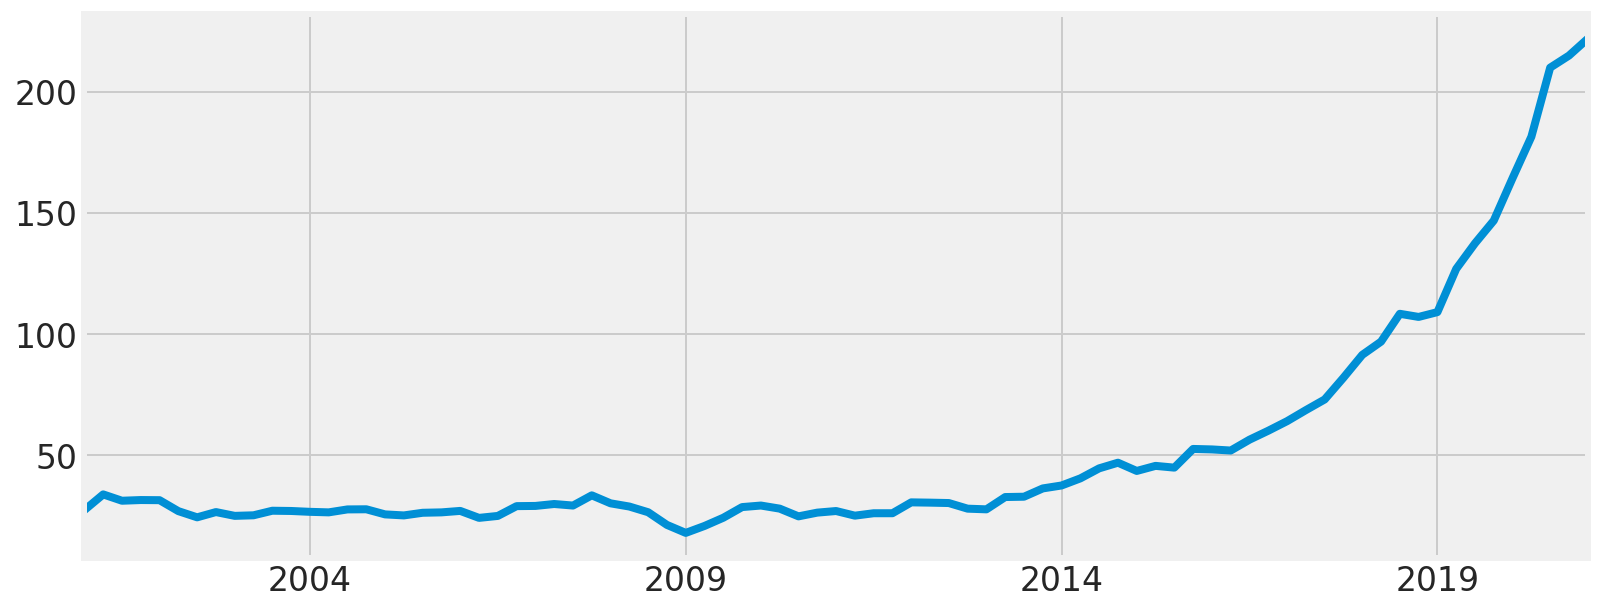

In [18]:
new_df['close'].plot(figsize=(12, 5))
plt.show()

### 2. Do Time Series Decomposition to check for Seasonality

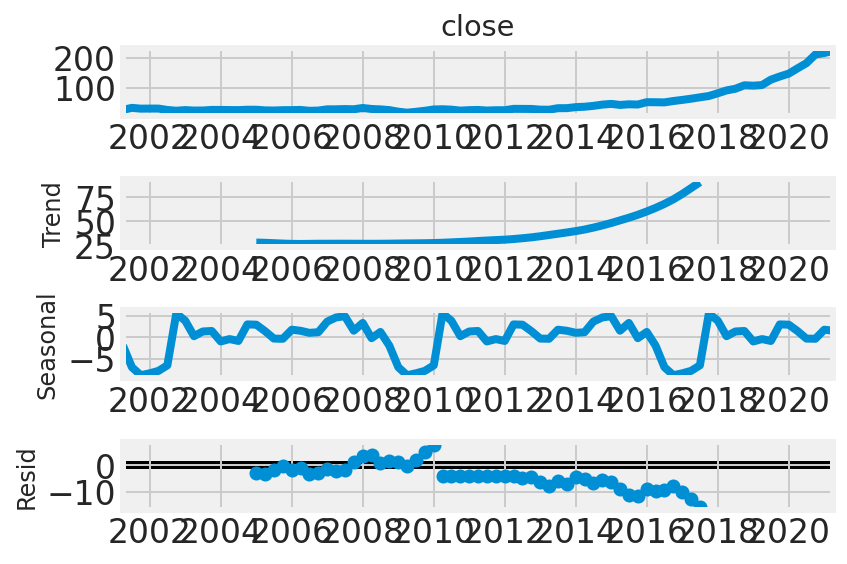

In [19]:
result = seasonal_decompose(new_df['close'],freq=30)
result.plot();

#### Test for Stationarity

#### if not, determine the d value (differencing)

#### 1. Check if stationary

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [21]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

In [22]:
adf_test(new_df['close'])

Augmented Dickey-Fuller Test: 
ADF test statistic       3.401597
p-value                  1.000000
# lags used             12.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


####  our data is not stationary

#### 2. Do differencing until we make our data stationary

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference and let $d=0$.
- If our time series is not stationary, then we difference either once ($d=1$) or twice ($d=2$). Differenced data often is stationary, so we difference our data, then model that!

In [23]:
# d = 1
adf_test(new_df['close'].diff().dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic       2.566388
p-value                  0.999068
# lags used             11.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [24]:
# d = 2
adf_test(new_df['close'].diff().diff().dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.083575
p-value                  0.251170
# lags used             10.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [25]:
# d = 3
adf_test(new_df['close'].diff().diff().diff().dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.693564e+00
p-value                 1.398445e-11
# lags used             9.000000e+00
# observations          6.800000e+01
critical value (1%)    -3.530399e+00
critical value (5%)    -2.905087e+00
critical value (10%)   -2.590001e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


After three times of differenced our data get a stationary

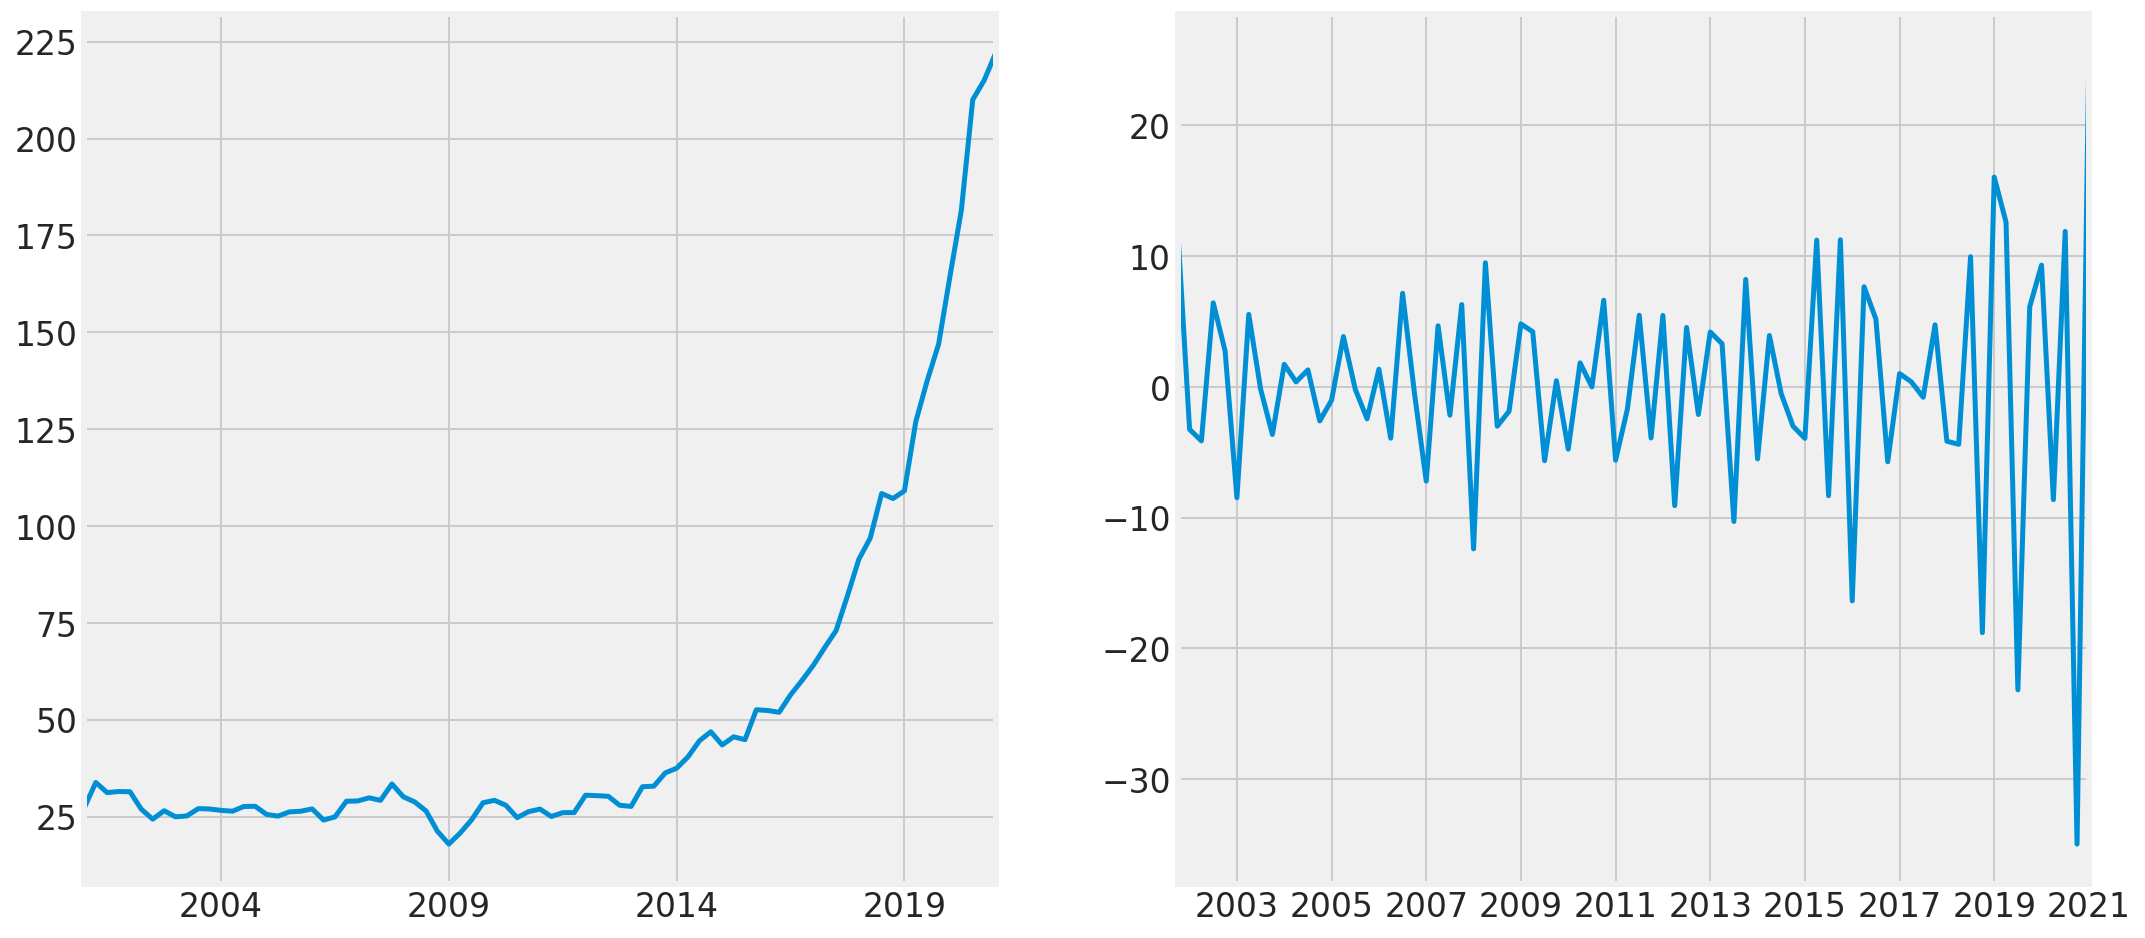

In [26]:
fig,ax=plt.subplots(ncols=2,figsize=(16,8))

new_df['close'].plot(lw=2.5, ax=ax[0])
new_df['close'].diff().diff().diff().dropna().plot(lw=2.5, ax=ax[1]);

### 3. Create ACF and PACF plots
#### Determine the p and q values (Manually)

#### 1. Create ACF and PACF plots on our differenced data

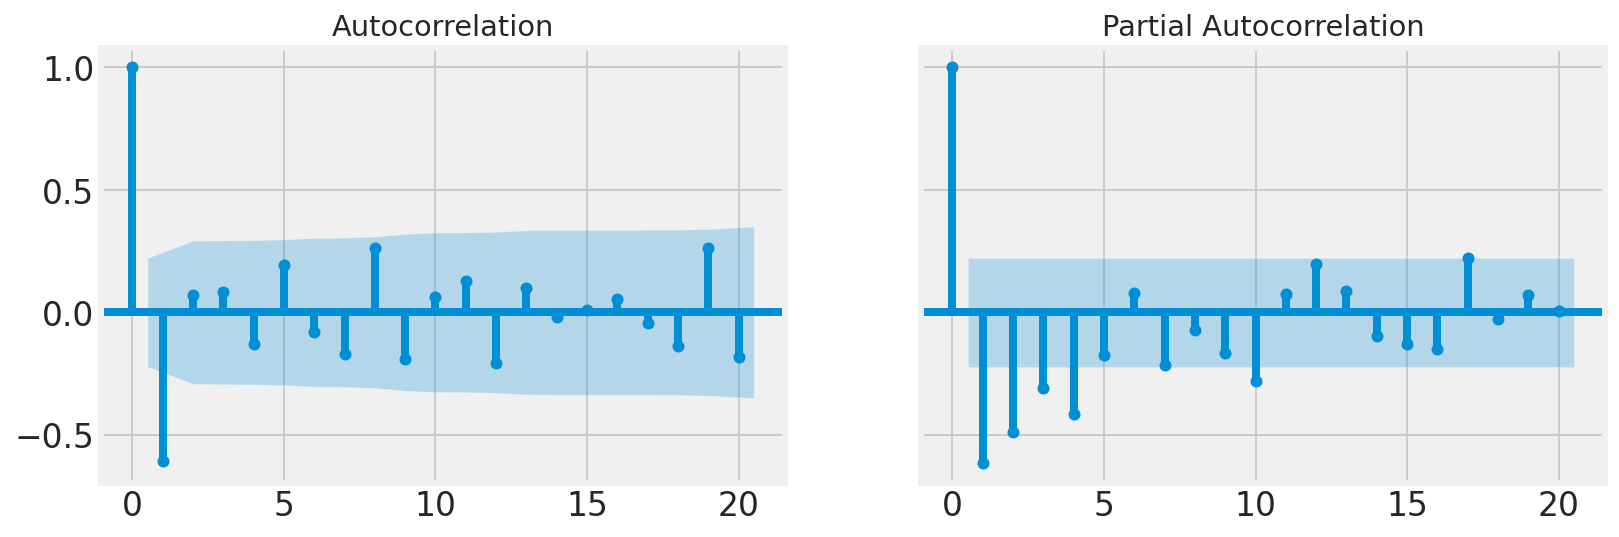

In [27]:
autocorr_plots(new_df['close'].diff().diff().diff().dropna(), lags=20);

### 4. Using Auto-ARIMA to determine (p,d,q)

In [28]:
auto_fit = auto_arima(new_df['close'], start_p=0, start_q=0,
                          max_p=2, max_q=2, 
                          m=1,                     # m is used for seasonality, m=1 means no seasonality (cover this later)
                          seasonal=False,          # We do not want seasonality here
                          d=None,  # The order of first-differencing. If None (by default), automatically be selected
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

auto_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=487.042, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=473.634, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=456.285, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=485.042, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=458.024, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=457.967, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=459.197, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=456.390, Time=0.03 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.412 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -225.143
Date:                Thu, 11 Feb 2021   AIC                            456.285
Time:                        05:12:23   BIC                            463.394
Sample:                             0   HQIC                           459.133
                                 - 81                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1582      0.121      1.311      0.190      -0.078       0.395
ma.L1         -0.8047      0.040    -20.075      0.000      -0.883      -0.726
sigma2        17.2659      1.941      8.897      0.000      13.462      21.070
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                40.36
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.99   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**What was the values of (p,d,q) suggested by auto-arima?**

As you can see the output of the summery, is suggests ARIMA(2,1,1) as the best based on AIC/BIC lowest values

### 5. Fit ARIMA model
#### 1. Train/Test Split

In [29]:
# See what are the ranges of our data
new_df.index.max(), new_df.index.min()

(Timestamp('2021-03-31 00:00:00', freq='Q-DEC'),
 Timestamp('2001-03-31 00:00:00', freq='Q-DEC'))

In [30]:
df_train = new_df.loc[:'2019']
df_test = new_df.loc['2019':]

In [31]:
df_train.shape

(76, 1)

In [32]:
df_test.shape

(9, 1)

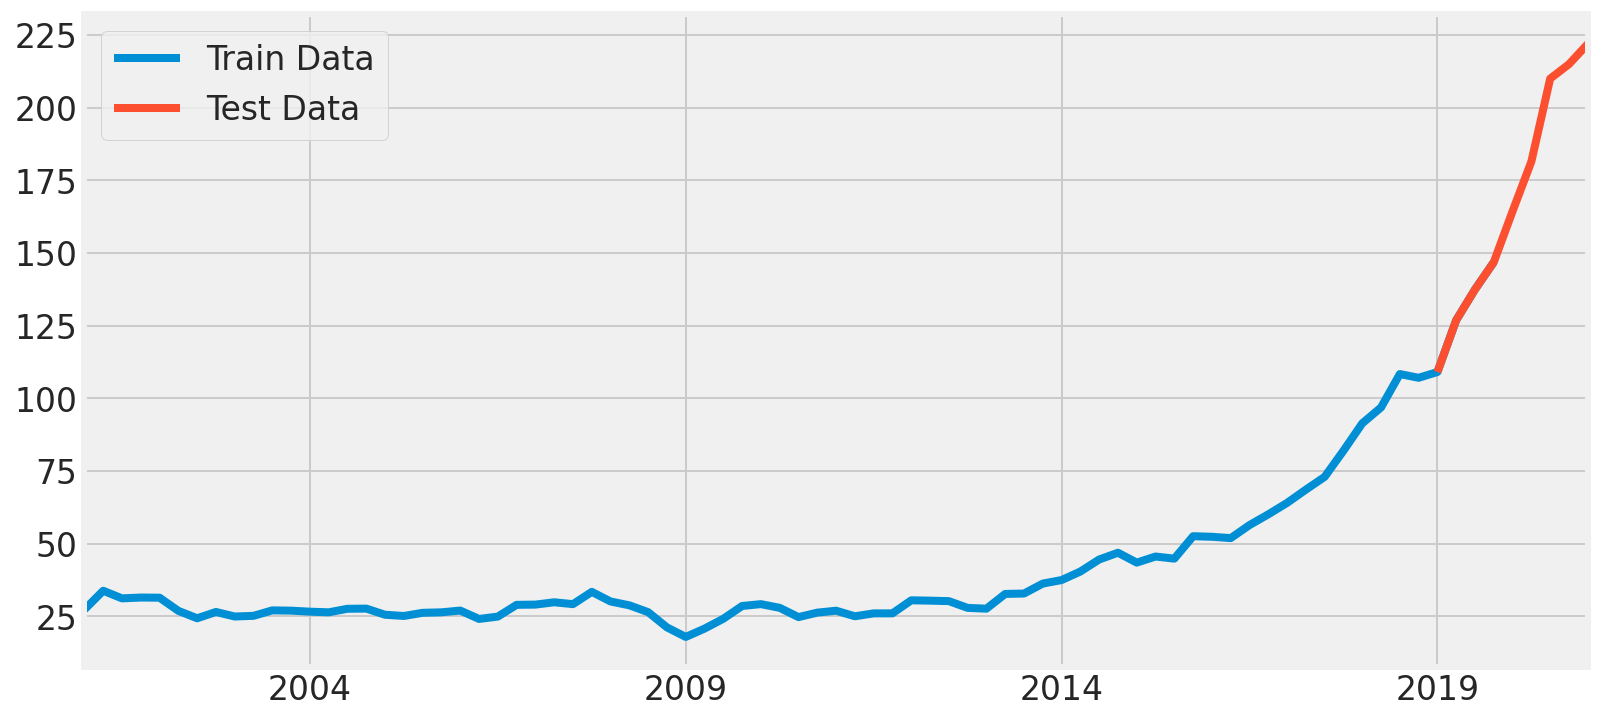

In [33]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots(figsize=(12,6))
df_train.plot(ax=ax)
df_test.plot(ax=ax)
ax.legend(labels=['Train Data','Test Data']);


#### 2. Fitting ARIMA models

In [34]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_train,order=(2,1,1))
res = model.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                   75
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -198.034
Method:                       css-mle   S.D. of innovations              3.367
Date:                Thu, 11 Feb 2021   AIC                            406.068
Time:                        05:12:25   BIC                            417.655
Sample:                    06-30-2001   HQIC                           410.694
                         - 12-31-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0035      2.650      1.133      0.257      -2.190       8.197
ar.L1.D.close     1.0171      0.145      7.026      0.000       0.733       1.301
ar.L2.D.close    -0.0384      0.139     -0.276      0.782      -0.311       0.234
ma.L1.D.close    -0.8013      0.084     -9.590      0.000      -0.965      -0.638
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0228           +0.0000j            1.0228            0.0000
AR.2           25.4296           +0.0000j           25.4296            0.0000
MA.1            1.2479           +0.0000j            1.2479            0.0000
-----------------------------------------------------------------------------
"""

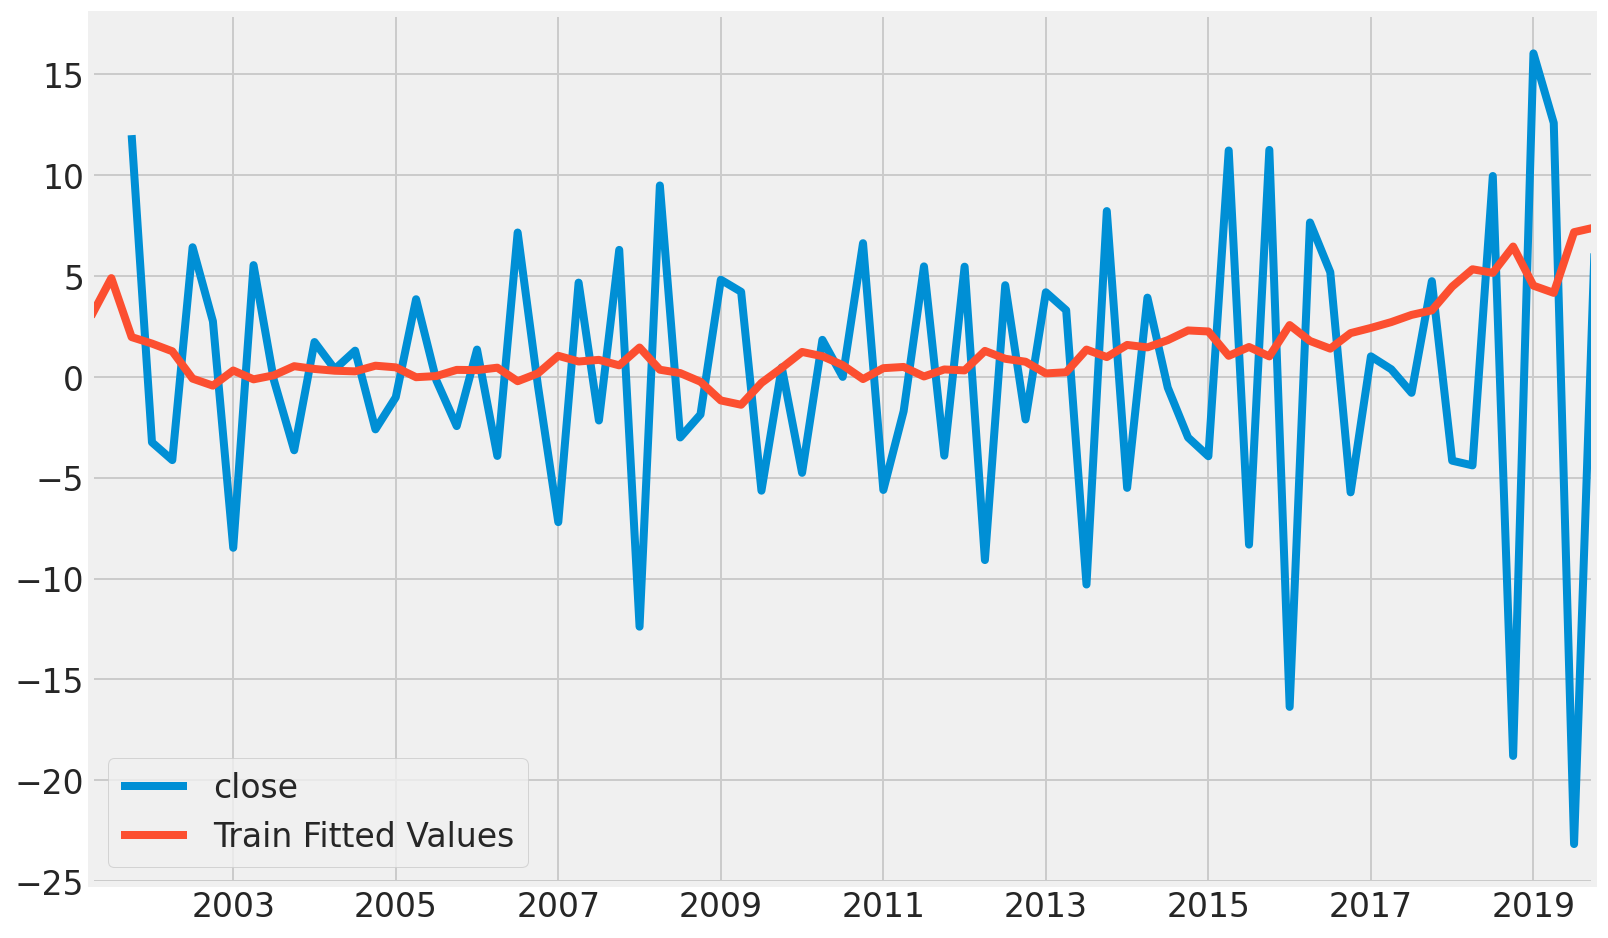

In [35]:
# plot our fitted values for train data

df_train.diff().diff().diff().dropna().plot(legend = True,figsize=(12,8))
res.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

#### 3. Predict values on the test dataset¶

In [36]:
# plot our prediction for test data


start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = res.predict(start, end,typ ='levels',dynamic=False) # .rename("Test predicted")  

In [37]:
predictions

2020-03-31    154.527590
2020-06-30    161.982840
2020-09-30    169.336430
2020-12-31    176.593042
2021-03-31    183.754931
2021-06-30    190.824210
2021-09-30    197.802942
2021-12-31    204.693143
2022-03-31    211.496786
Freq: Q-DEC, dtype: float64

In [38]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<4.4}, expected={df_test['close'][i]}")

predicted=154.5, expected=109.10295081967213
predicted=162.0, expected=126.95539682539679
predicted=169.3, expected=137.51328109375004
predicted=176.6, expected=146.90547
predicted=183.8, expected=164.4490325806452
predicted=190.8, expected=181.52395222222222
predicted=197.8, expected=210.03015312499994
predicted=204.7, expected=215.01015531250002
predicted=211.5, expected=221.97526105263157


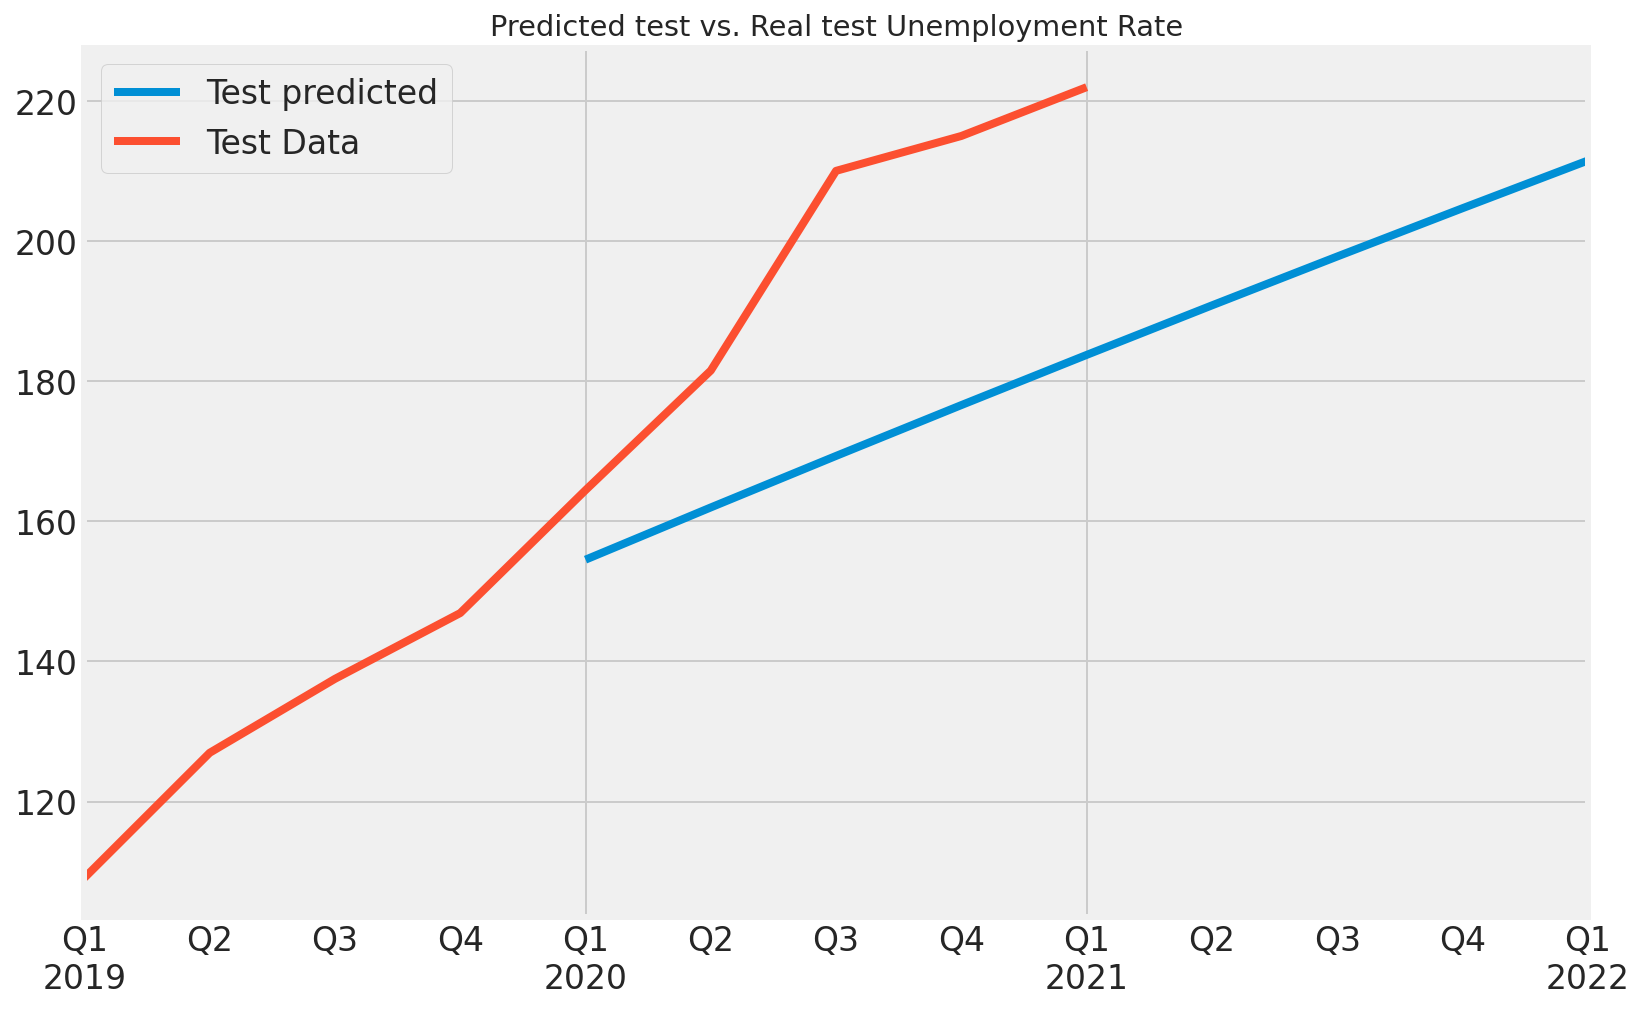

In [39]:
# plot predictions and actual test values 
title = 'Predicted test vs. Real test Unemployment Rate'
ax=predictions.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted','Test Data']);

#### 4. Evaluate the Model

In [40]:
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import rmse

error1 = mse(df_test['close'], predictions)
print(f'ARIMA(2,1,1) MSE Error: {error1:11.10}')

error2 = rmse(df_test['close'], predictions)
print(f'ARIMA(2,1,1) RMSE Error: {error2:11.10}')

ARIMA(2,1,1) MSE Error: 667.7045307
ARIMA(2,1,1) RMSE Error: 25.83997931


In [41]:
new_df['close'].mean()

52.083901584824524

### 6. Forcast the Future

In [42]:
# Do a forcast for 1 Quarter (3 months) (2021Q1 to 2021Q2)
fcast = res.predict(start=len(df_test),end=len(df_test)+1,typ='levels',dynamic=False).rename('ARIMA(2,1,1) Forecast')


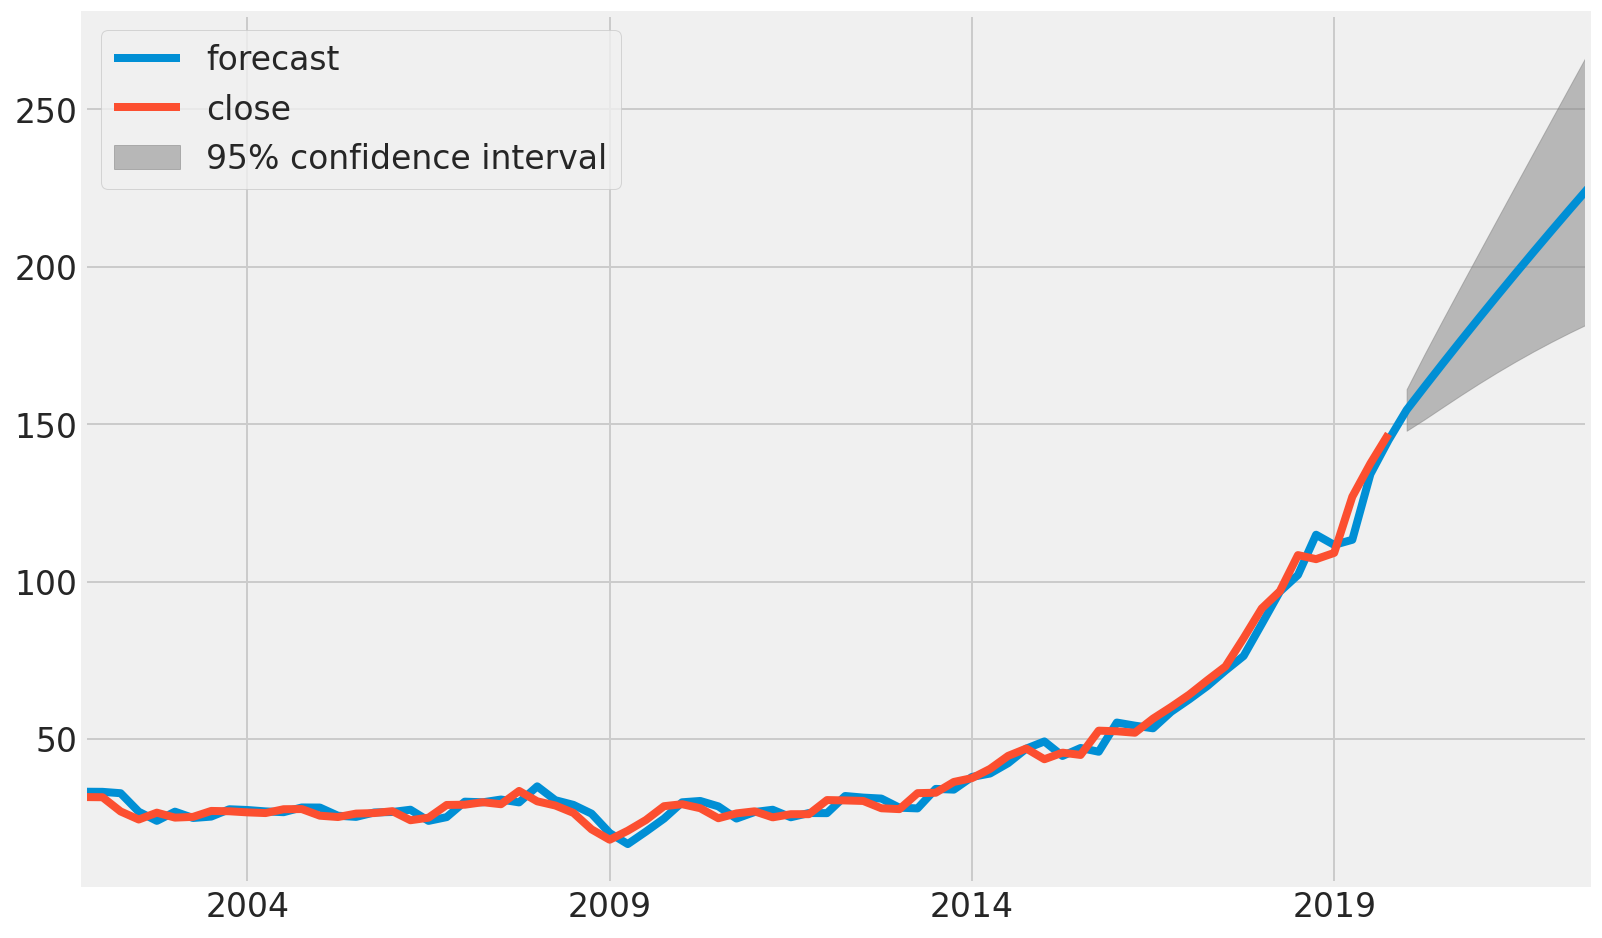

In [43]:
# starting and end points for forecasting for our previous model

start_1 = 3
end_1 = len(df_train)+len(df_test)+1
fig, ax = plt.subplots(figsize=(12,8)) 
res.plot_predict(start=start_1, end=end_1, ax =ax,)
plt.legend(loc=2);

# Recurrent Neural Network (LSTM Model)

### It is worthy noted that LTSM model is sensitive to the scale of data; therefore, we will apply MinMax scaler

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [45]:
lstm= df.copy()
lstm.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [46]:
lstm.reset_index(inplace=True)
lstm.rename(columns={'index': 'date'}, inplace=True)
lstm.head()

,date,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


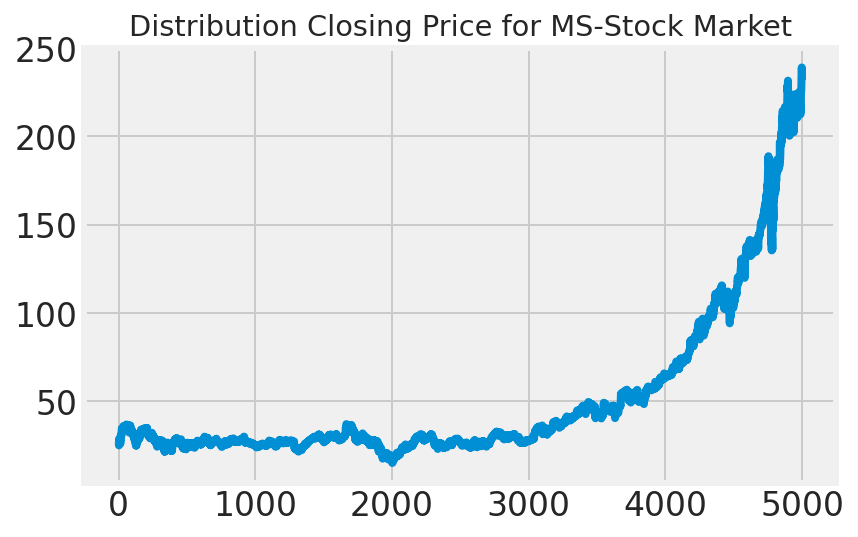

In [47]:
#The value that we want to predict is the 4th column (Close). Defining Y as this column
L = len(lstm)
Y = lstm.iloc[:,4]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.title('Distribution Closing Price for MS-Stock Market')
plt.show(block= False)


In [48]:
#We will use shifted versions of the Y column this is to say use 3 delays of Y as inputs to predict the output of our data.
X1= Y[0:L-3,:]
X2=Y[1:L-2,:]
X3=Y[2:L-1,:]
Y = Y[3:L,:]
X= np.concatenate([X1,X2,X3],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')

X shape is (4997, 3)
Y shape is (4997, 1)


In [49]:
from sklearn.preprocessing import MinMaxScaler

#standardising our data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)
X= np.reshape(X, (X.shape[0],1,X.shape[1]))


#### Splitting the dataset into train and test sets


In [50]:
#Let’s now define training and test sets for our model
#4907 => 4997-90 => 1Q

X_train = X[:4907,:,:]
X_test = X[4907:,:,:]
Y_train = Y[:4907,:]
Y_test = Y[4907:,:]


In [51]:
len(X_train), len(X_test)

(4907, 90)

In [52]:
# 10 units is chosen, hyperbolic tangent for the activation. 
# input shape of (1,3) because we have 3 delays (the X1, X2 and X3 that we defined before). 
# hard sigmoid is used for reccurent activation.

model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid'))

In [53]:
# Instatiating an output layer to the model. We use only one output for our model.

model.add(Dense(1))

### Our neural network is created, it is now to be compiled. 

In [54]:
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mse])
model.fit(X_train,Y_train,epochs=10,verbose=2)
Predict = model.predict(X_test)

Epoch 1/10
154/154 - 3s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 2/10
154/154 - 0s - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 3/10
154/154 - 0s - loss: 5.1219e-05 - mean_squared_error: 5.1219e-05
Epoch 4/10
154/154 - 0s - loss: 4.2668e-05 - mean_squared_error: 4.2668e-05
Epoch 5/10
154/154 - 0s - loss: 4.0380e-05 - mean_squared_error: 4.0380e-05
Epoch 6/10
154/154 - 0s - loss: 4.0898e-05 - mean_squared_error: 4.0898e-05
Epoch 7/10
154/154 - 0s - loss: 4.0603e-05 - mean_squared_error: 4.0603e-05
Epoch 8/10
154/154 - 0s - loss: 4.0322e-05 - mean_squared_error: 4.0322e-05
Epoch 9/10
154/154 - 0s - loss: 4.0615e-05 - mean_squared_error: 4.0615e-05
Epoch 10/10
154/154 - 0s - loss: 4.0272e-05 - mean_squared_error: 4.0272e-05


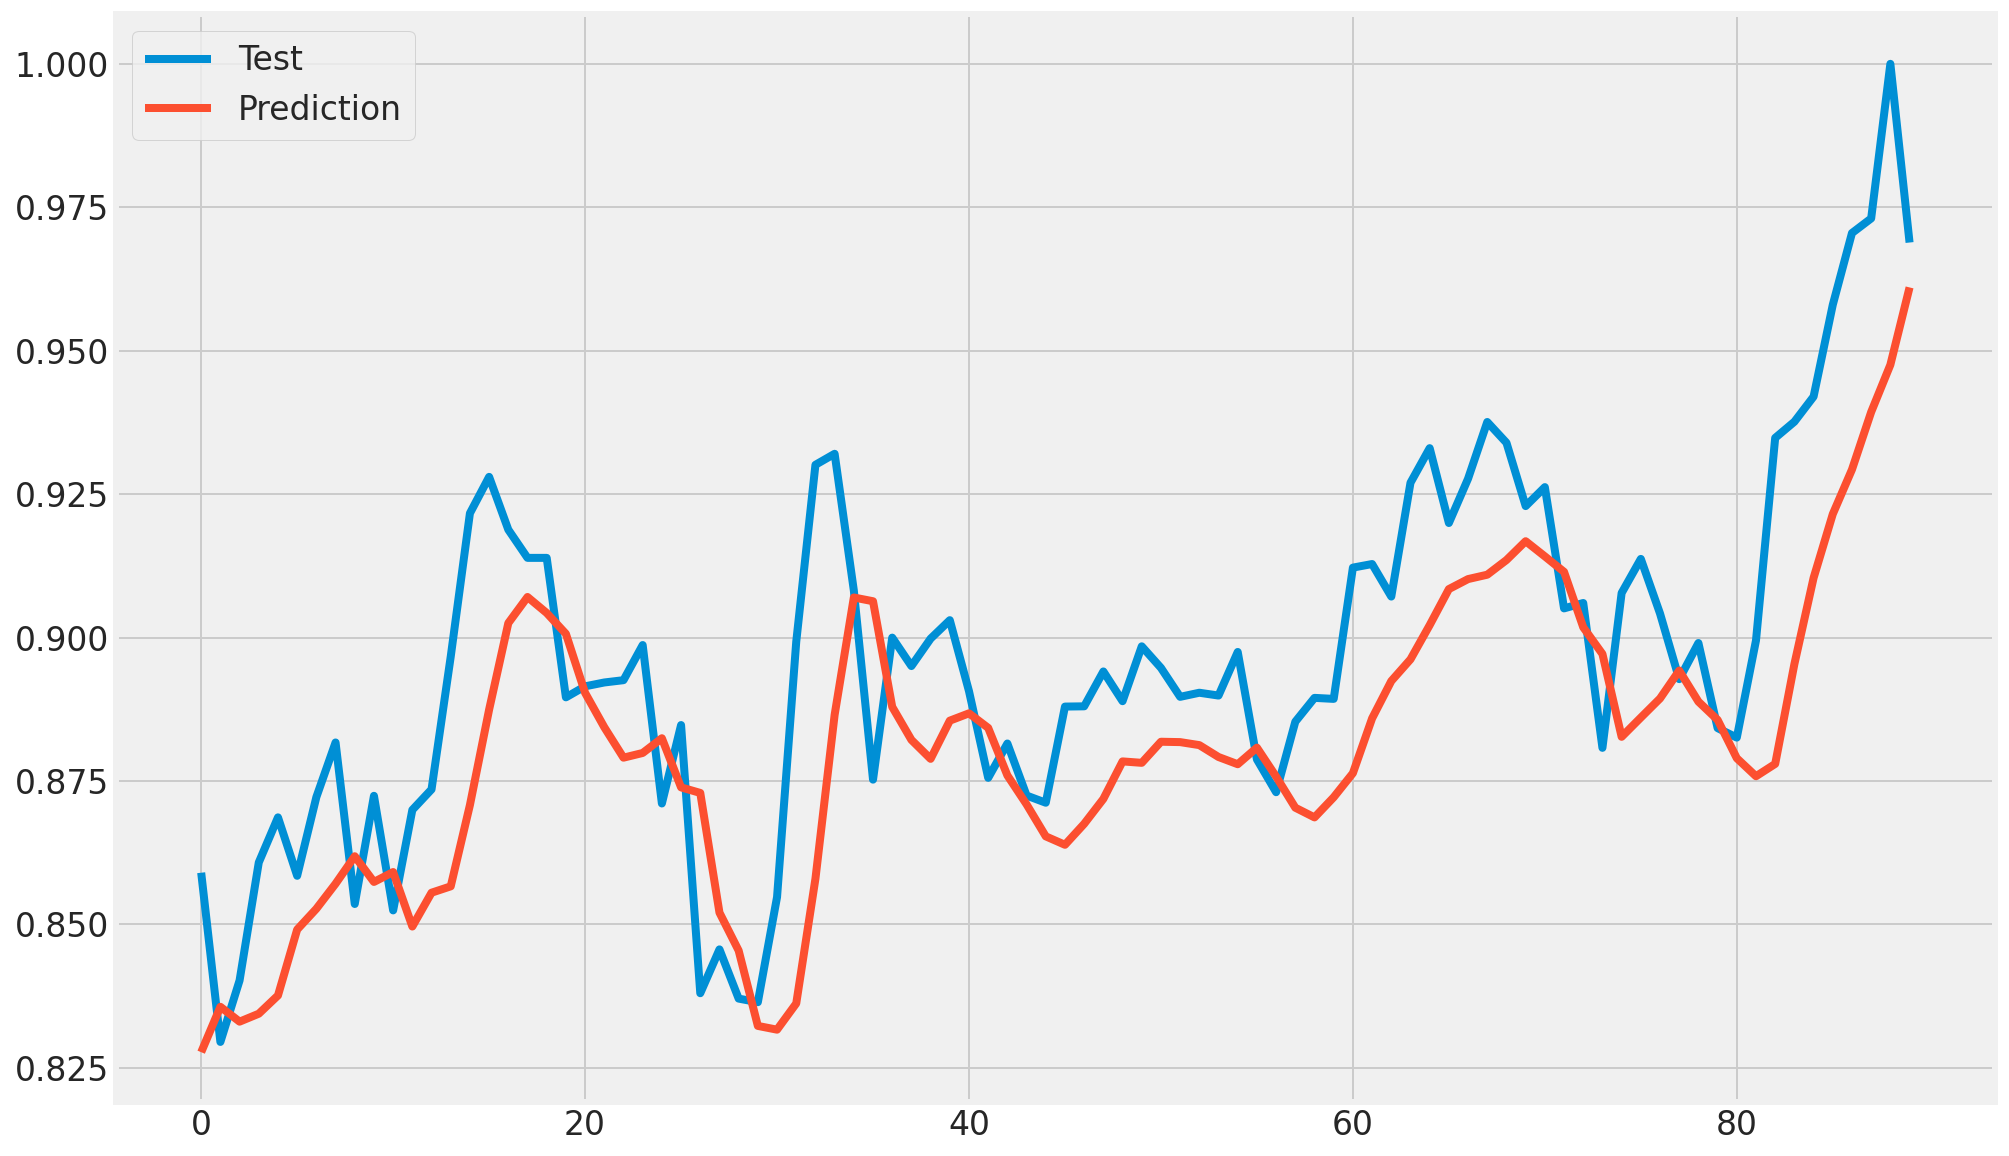

In [55]:
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Predict)
print('MSE Performance Metrics scores of RNN_LSTM model for Closing Price of MS Stock Market is:    ', mse)
rmse = np.sqrt(mse)
print('RMSE Performance Metrics scores of RNN_LSTM model for Closing Price of MS Stock Market is:    ',rmse)

MSE Performance Metrics scores of RNN_LSTM model for Closing Price of MS Stock Market is:     0.0005852203186088093
RMSE Performance Metrics scores of RNN_LSTM model for Closing Price of MS Stock Market is:     0.02419132734284767


# Scale back to the original scale

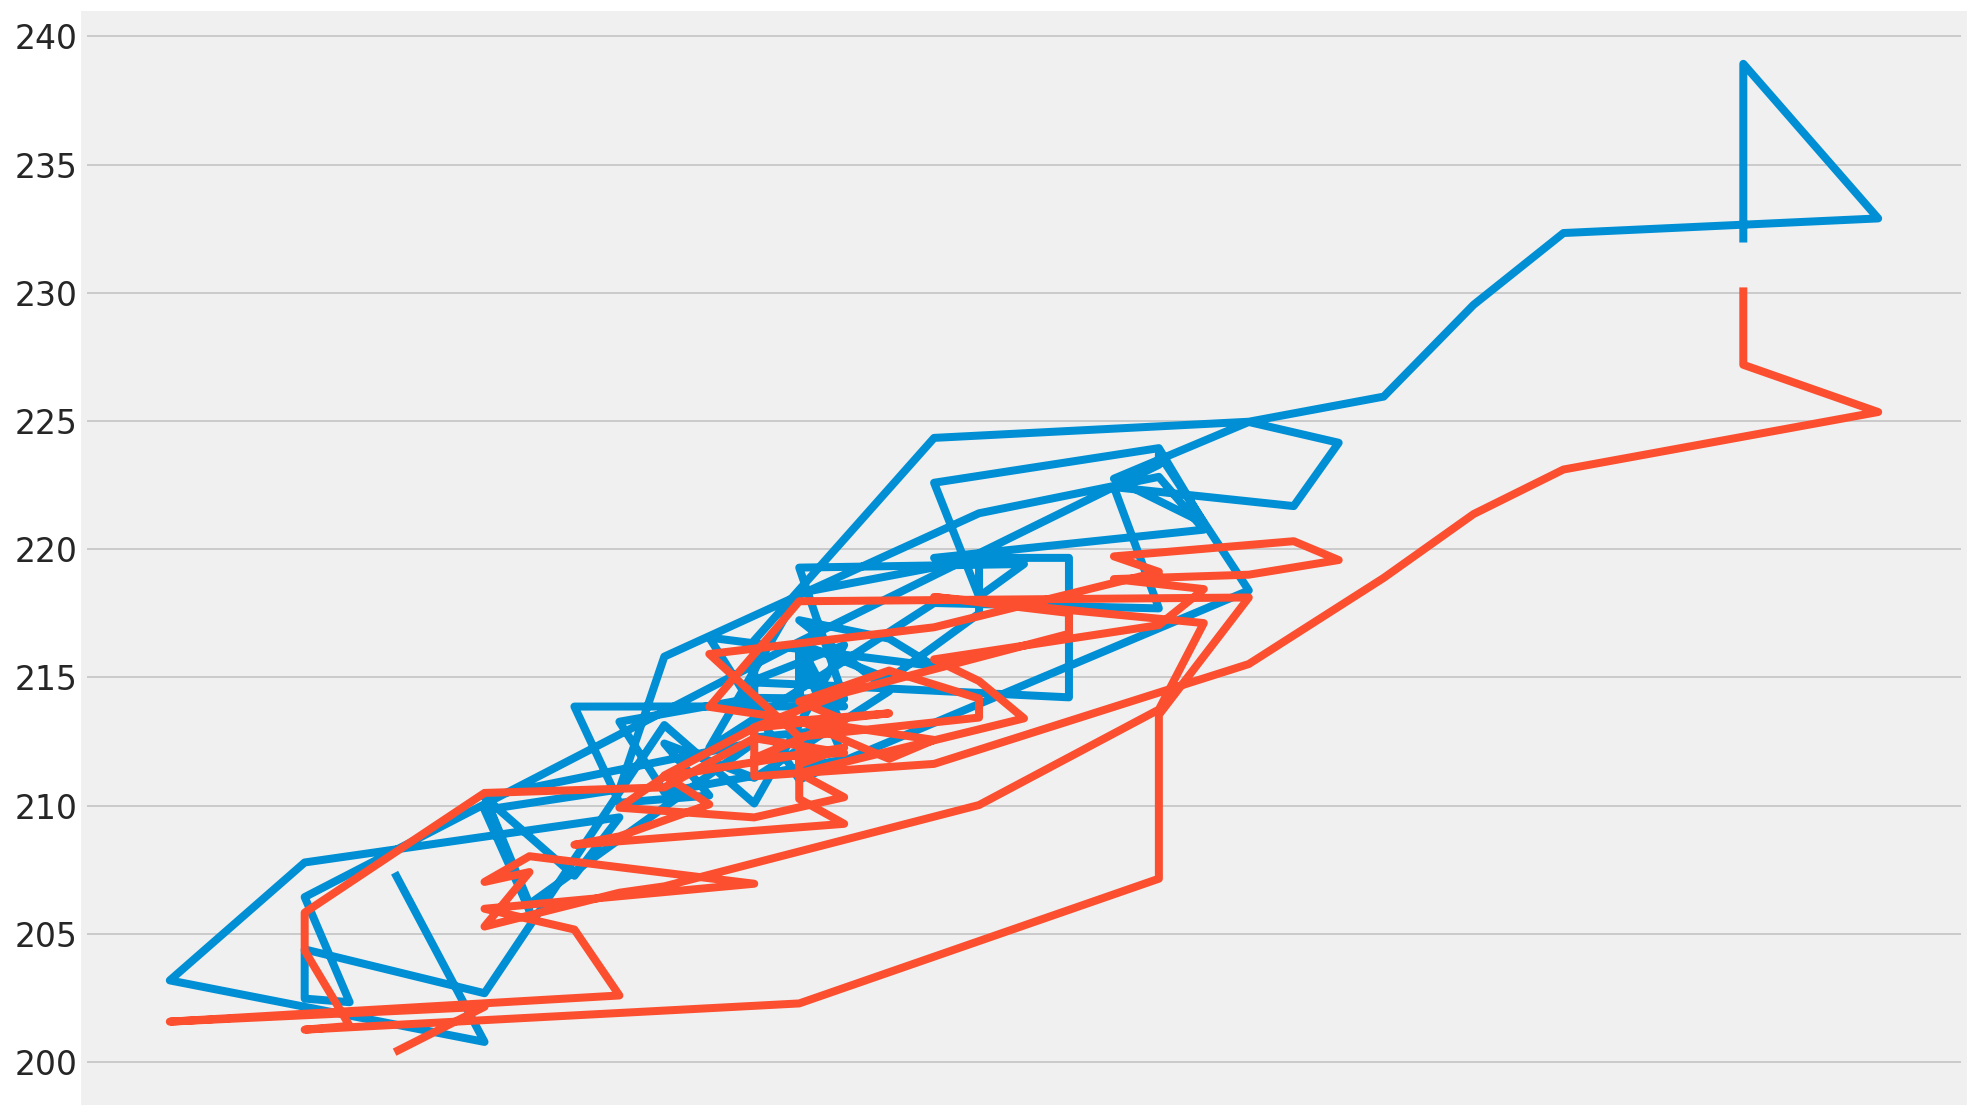

In [57]:
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:4910,0])
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[4910:,0])
Predict = model.predict(X_test)
Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[4910:,0])
plt.figure(figsize=(15,10))
plt.plot(Y_test)
plt.plot(Predict)
plt.show()

# Evaluating using Facebook Prophet model

In [58]:
pip install fbprophet

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install pystan

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [60]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [61]:
df = pd.read_csv('../input/microsoft-stock-market-2001-2021/MSFT_Stock.csv', index_col=0)

In [62]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'date'}, inplace=True)

df.head()

,date,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [63]:
from pandas import DataFrame
prophet= pd.DataFrame()

prophet['date']= df.date
prophet['close']= df.close

prophet.head()

,date,close
0,2001-03-16,27.28125
1,2001-03-19,27.15625
2,2001-03-20,26.34375
3,2001-03-21,25.03125
4,2001-03-22,27.00000


In [64]:
prophet.columns=['ds','y']

prophet.head()

,ds,y
0,2001-03-16,27.28125
1,2001-03-19,27.15625
2,2001-03-20,26.34375
3,2001-03-21,25.03125
4,2001-03-22,27.00000


In [65]:
prophet.dropna(inplace=True)


<AxesSubplot:xlabel='ds'>

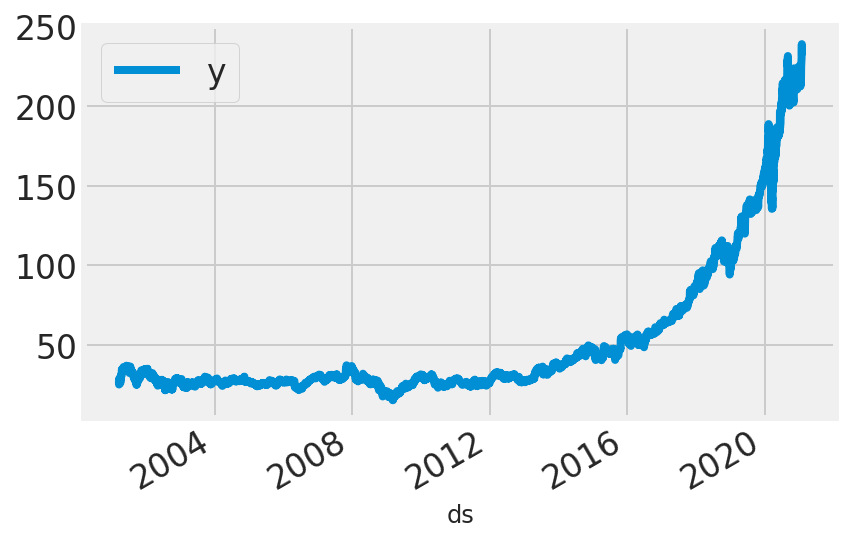

In [66]:
prophet['ds']=pd.to_datetime(prophet.ds)
prophet.plot(x='ds',y='y')


## Splitting the data into train and test to start running our model.


In [67]:
prophet_train=prophet[:4820]
prophet_test=prophet[4820:]

# Forecasting Closing Price of MS Stock Marketwith Prophet (Base model)
Generating a Quarter ahead forecast of MS Stock Marketwith using Prophet.

In [68]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(prophet_train)
future=m.make_future_dataframe(periods=3,freq='MS')
forecast=m.predict(prophet_test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-05-14,48.605047,157.003023,166.613970,48.605047,48.605047,2.329269,2.329269,2.329269,2.277952,2.277952,2.277952,0.051317,0.051317,0.051317,0.0,0.0,0.0,161.819276
1,2020-05-15,48.629767,156.691042,166.560577,48.629767,48.629767,2.317011,2.317011,2.317011,2.278784,2.278784,2.278784,0.038227,0.038227,0.038227,0.0,0.0,0.0,161.305464
2,2020-05-18,48.703926,154.205325,164.149678,48.703926,48.703926,2.272219,2.272219,2.272219,2.272291,2.272291,2.272291,-0.000072,-0.000072,-0.000072,0.0,0.0,0.0,159.369919
3,2020-05-19,48.728646,154.205172,164.444683,48.728646,48.728646,2.268826,2.268826,2.268826,2.280717,2.280717,2.280717,-0.011891,-0.011891,-0.011891,0.0,0.0,0.0,159.285477
4,2020-05-20,48.753366,154.205271,163.460100,48.753366,48.753366,2.252709,2.252709,2.252709,2.275656,2.275656,2.275656,-0.022947,-0.022947,-0.022947,0.0,0.0,0.0,158.580496


**yhat:** yhat is a notation traditionally used to represent the predicted values of a value y)

**yhat_lower:** the lower bound of our forecasts

**yhat_upper:** the upper bound of our forecasts

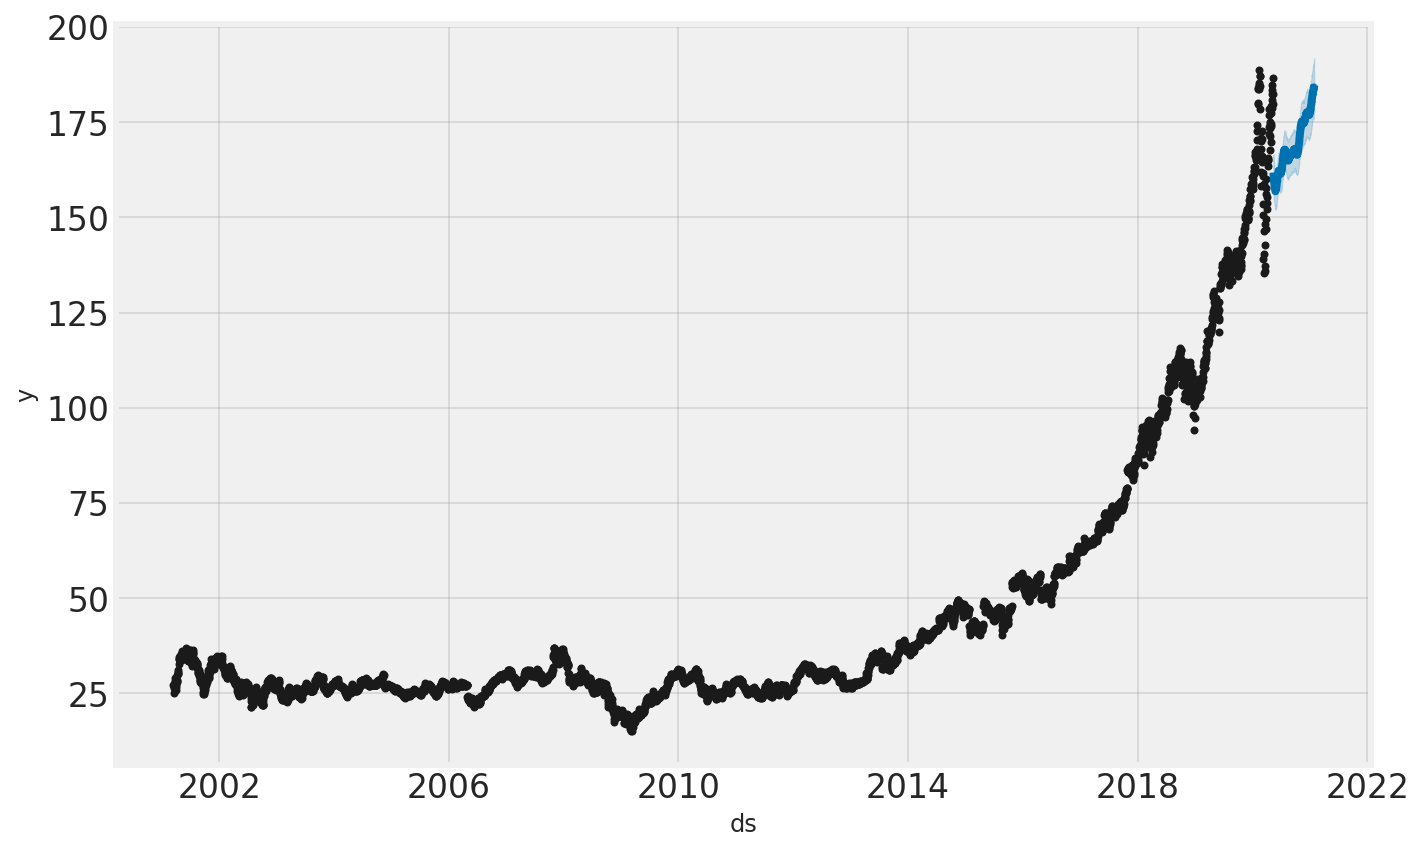

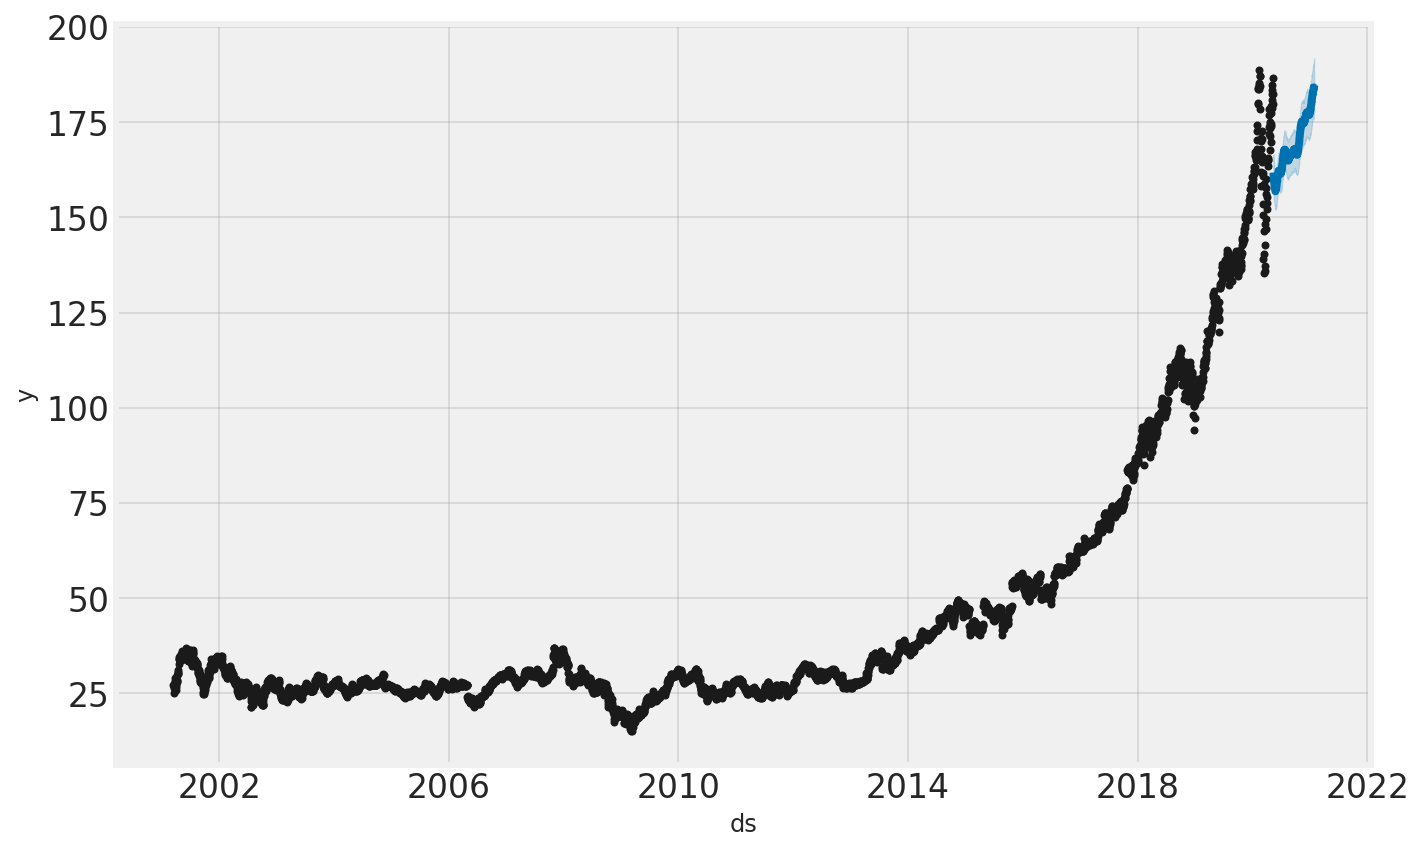

In [69]:
m.plot(forecast)


/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


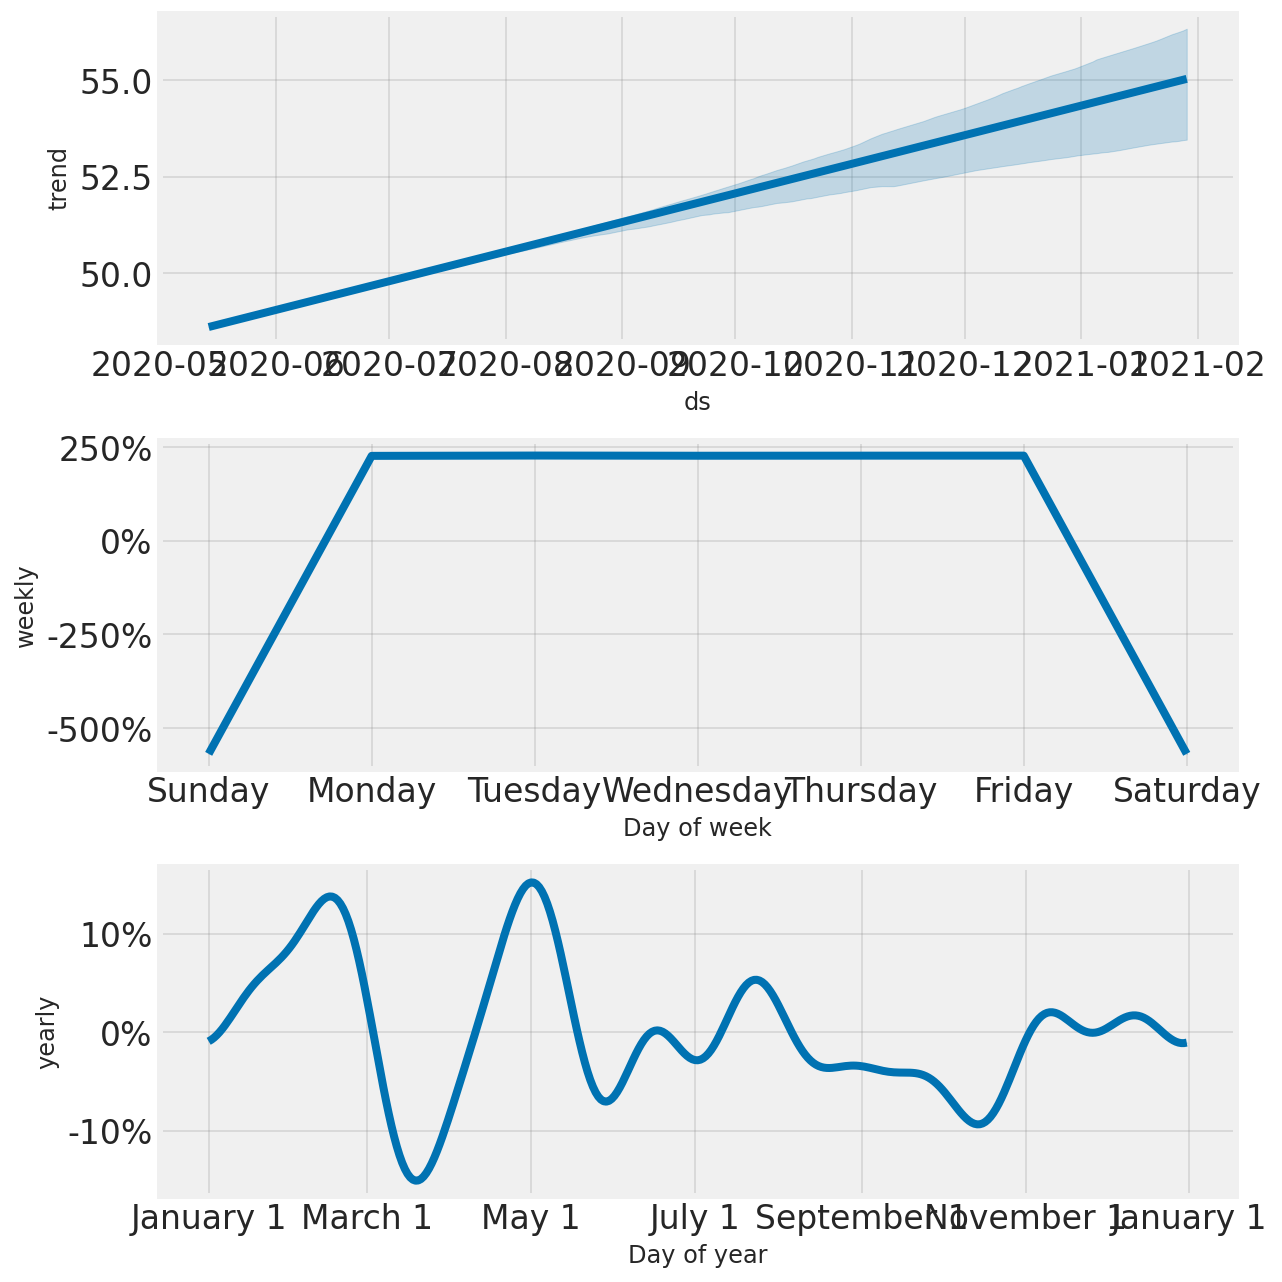

In [70]:
fig1 = m.plot_components(forecast)
plt.show()


In [71]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [72]:
plot_components_plotly(m, forecast)

<AxesSubplot:xlabel='ds'>

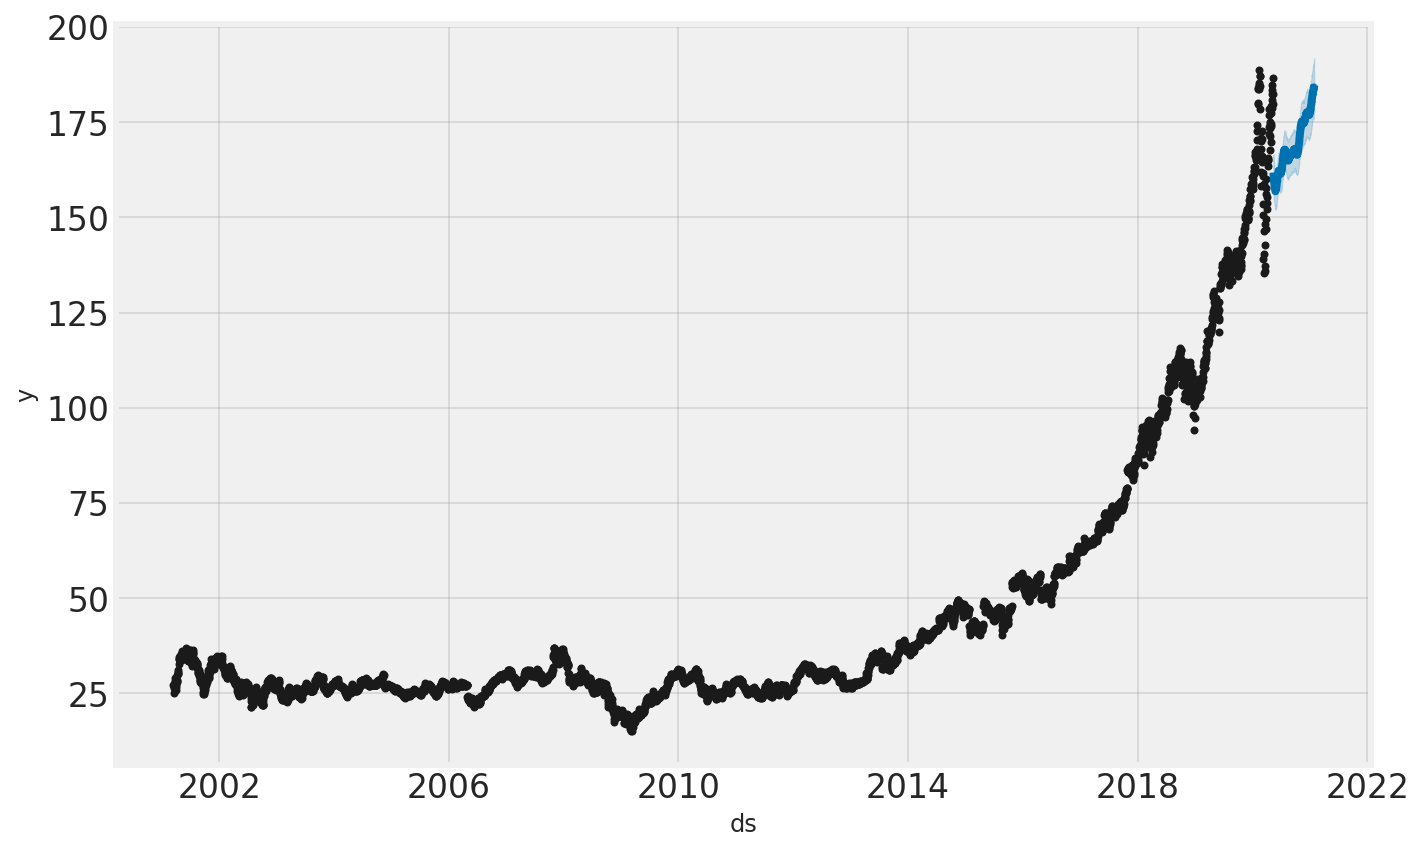

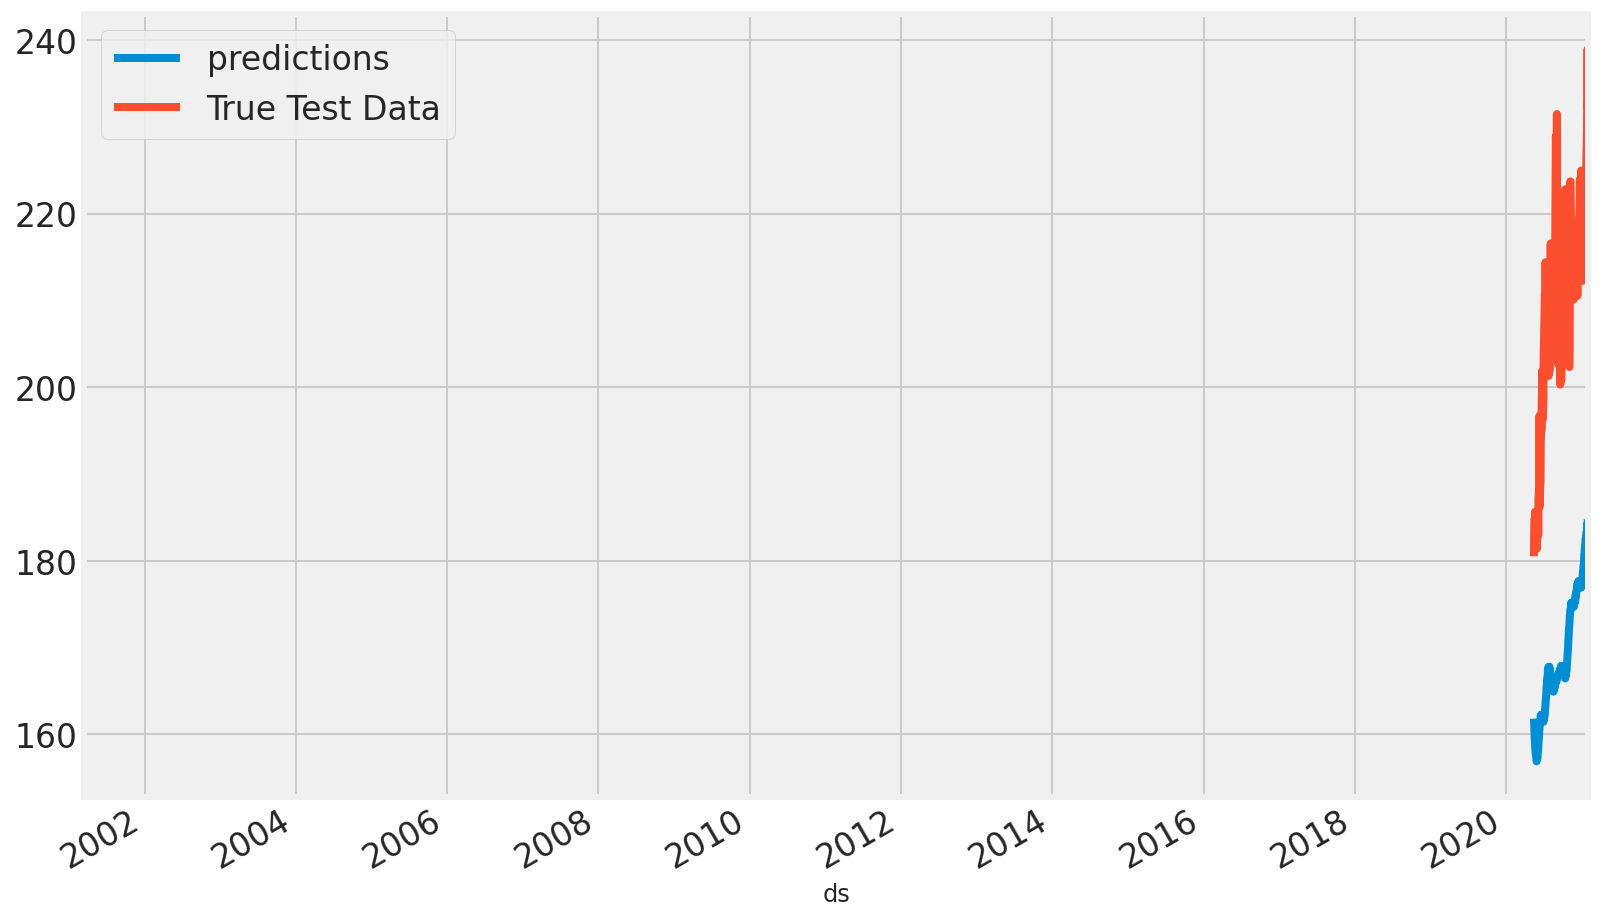

In [73]:
m.plot(forecast)
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
prophet_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2001-03-16', '2021-01-29'))

## Validating the Model

In [74]:
# Initial training period.
initial= 2*365
initial= str(initial)+' days'

#Period length that we perform the cross validation for.
period= 2*90
period=str(period)+' days'

#Horizon of prediction essentially for each fold.
horizon = 90
horizon=str(horizon)+' days'
prophet_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)

# Performance Metrics of fb_cv
performance_metrics(prophet_cv)


  0%|          | 0/35 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,62.266998,7.890944,4.582065,0.089927,0.064597,0.444240
1,10 days,58.401058,7.642058,4.530815,0.090075,0.064236,0.443502
2,11 days,62.365803,7.897202,4.737386,0.093307,0.064236,0.423041
3,12 days,65.358395,8.084454,4.880639,0.095123,0.066759,0.420357
4,13 days,69.095468,8.312368,5.015422,0.095462,0.070969,0.403502
...,...,...,...,...,...,...,...
77,86 days,66.871427,8.177495,6.159984,0.144487,0.122909,0.304516
78,87 days,67.409690,8.210340,6.216151,0.146151,0.125262,0.298003
79,88 days,74.746780,8.645622,6.455549,0.149890,0.129420,0.291925
80,89 days,79.301741,8.905152,6.588592,0.151824,0.129665,0.290323


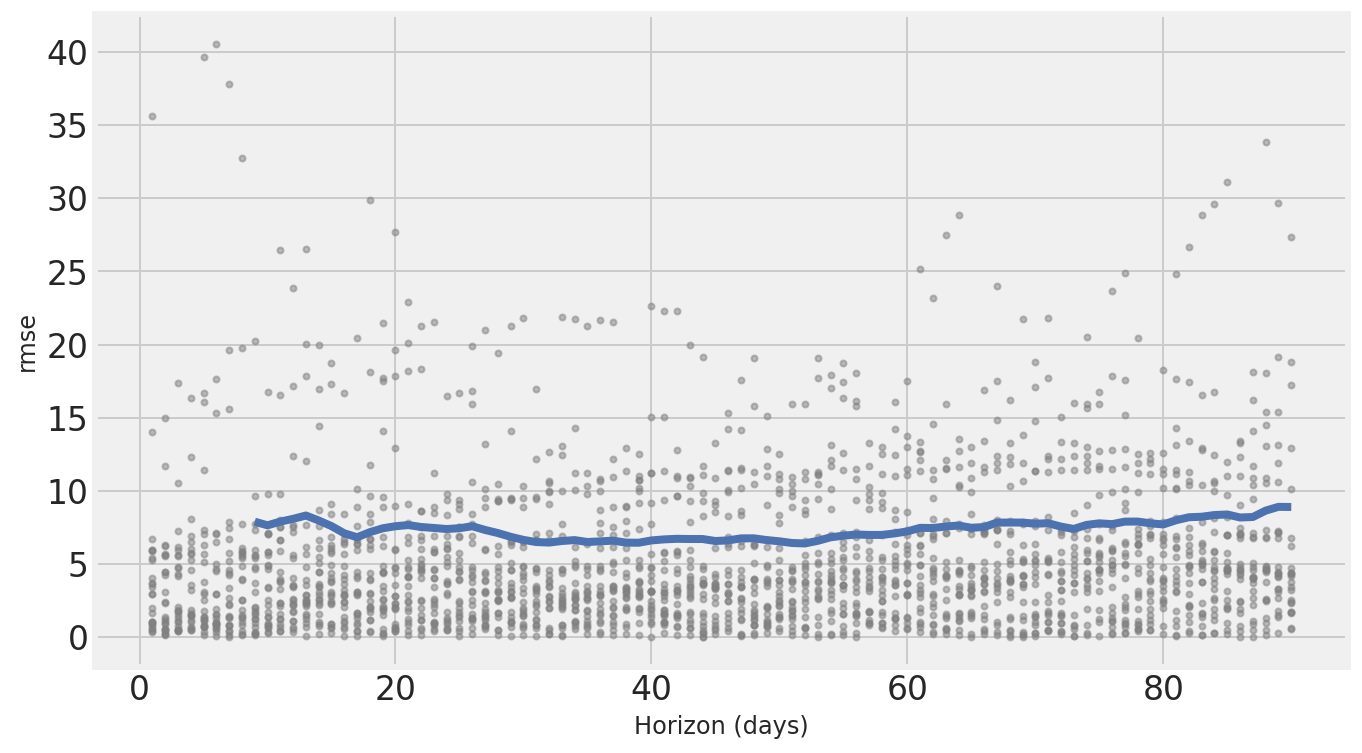

In [75]:
plot_cross_validation_metric(prophet_cv,'rmse');


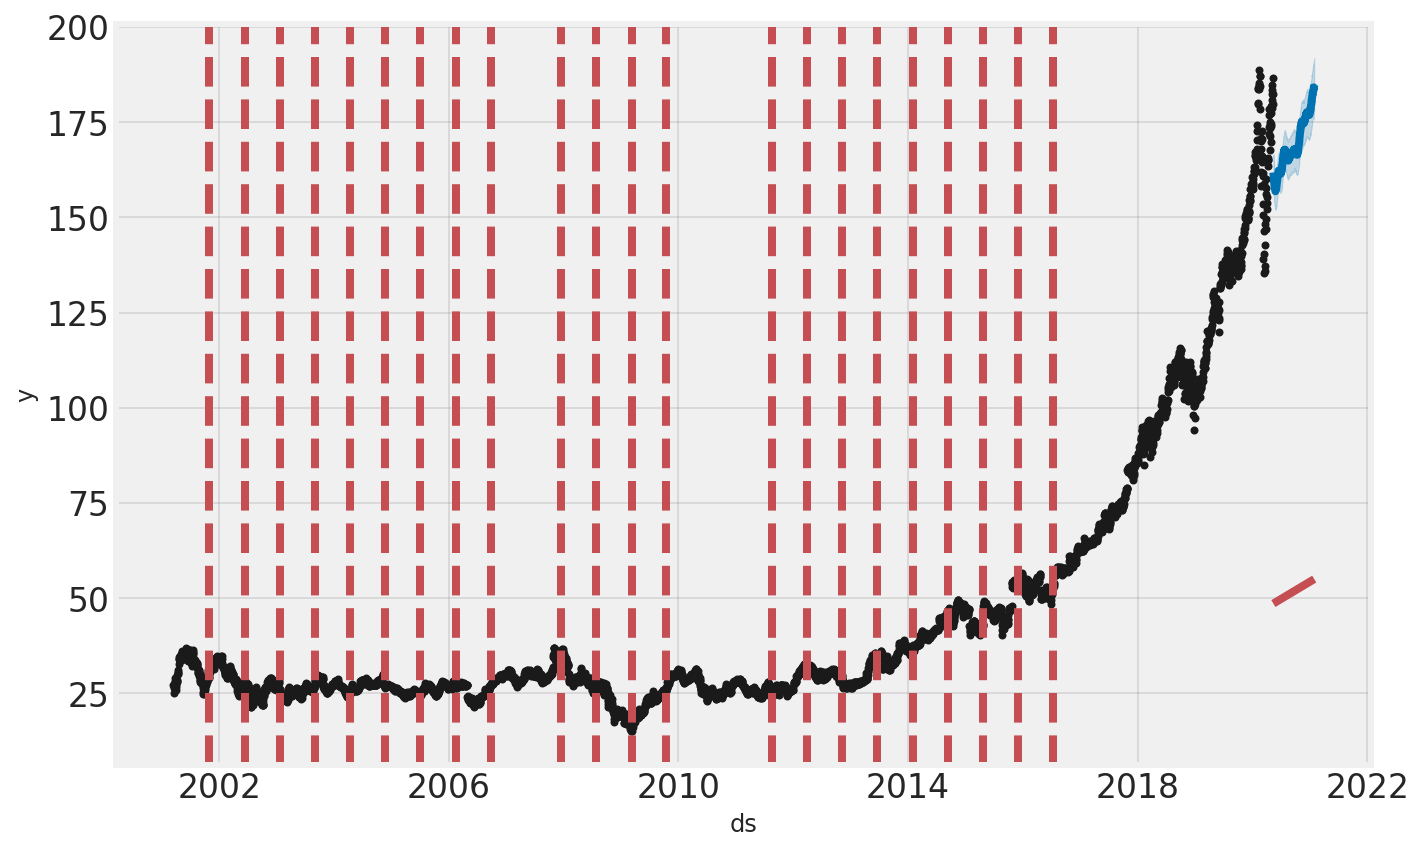

In [76]:
# changing trend points
from fbprophet.plot import add_changepoints_to_plot

fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [77]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(prophet_cv.y, prophet_cv.yhat)
print('MSE Performance Metrics scores of FaceBook Prophet model for Closing Price of MS Stock Market is:    ', mse)
rmse = np.sqrt(mse)
print('RMSE Performance Metrics scores of FaceBook Prophet model for Closing Price of MS Stock Market is:    ',rmse)

MSE Performance Metrics scores of FaceBook Prophet model for Closing Price of MS Stock Market is:     55.673369999938856
RMSE Performance Metrics scores of FaceBook Prophet model for Closing Price of MS Stock Market is:     7.461458972609771


# As it was demonistrated that RNN Model has the best performance amongst the others; thus, the forecasting step is going to be based on RNN as follows:

In [78]:
df = pd.read_csv('../input/microsoft-stock-market-2001-2021/MSFT_Stock.csv', index_col=0)

df.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [79]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_RNN = pd.DataFrame(df.iloc[:,3])


scaler.fit(train_RNN)
scaled_train_RNN = scaler.transform(train_RNN)

n_input = 4907
n_features = 1
generator = TimeseriesGenerator(scaled_train_RNN, scaled_train_RNN, length=n_input, batch_size=1)

# define model
model_RNN = Sequential()
model_RNN.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
model_RNN.add(Dense(1))
model_RNN.compile(optimizer='adam', loss='mse')
# fit model
model_RNN.fit_generator(generator,epochs=10)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/10
93/93 [==============================] - 166s 2s/step - loss: 0.3808
Epoch 2/10
93/93 [==============================] - 166s 2s/step - loss: 7.6047e-04
Epoch 3/10
93/93 [==============================] - 166s 2s/step - loss: 8.7572e-04
Epoch 4/10
93/93 [==============================] - 166s 2s/step - loss: 8.4283e-04
Epoch 5/10
93/93 [==============================] - 167s 2s/step - loss: 0.0012
Epoch 6/10
93/93 [==============================] - 166s 2s/step - loss: 0.0012
Epoch 7/10
93/93 [==============================] - 166s 2s/step - loss: 7.1637e-04
Epoch 8/10
93/93 [==============================] - 166s 2s/step - loss: 8.9214e-04
Epoch 9/10
93/93 [==============================] - 165s 2s/step - loss: 8.1341e-04
Epoch 10/10
93/93 [==============================] - 166s 2s/step - loss: 0.0010


In [80]:
forecast_RNN = []

eval_RNN = scaled_train_RNN[-n_input:]
current_RNN = eval_RNN.reshape((1, n_input, n_features))

for i in range(90):
    current_pred_RNN = model_RNN.predict(current_RNN)[0]
    forecast_RNN.append(current_pred_RNN) 
    current_RNN = np.append(current_RNN[:,1:,:],[[current_pred_RNN]],axis=1)

forecast_RNN= scaler.inverse_transform(forecast_RNN)

In [81]:
forecast_RNN = pd.DataFrame({'Forecast':forecast_RNN.flatten()})
forecast_RNN.index = np.arange('2021-01-30',90,dtype='datetime64[D]')
forecast_RNN.head()

,Forecast
2021-01-30,241.774628
2021-01-31,245.137167
2021-02-01,248.740623
2021-02-02,252.780349
2021-02-03,257.316047


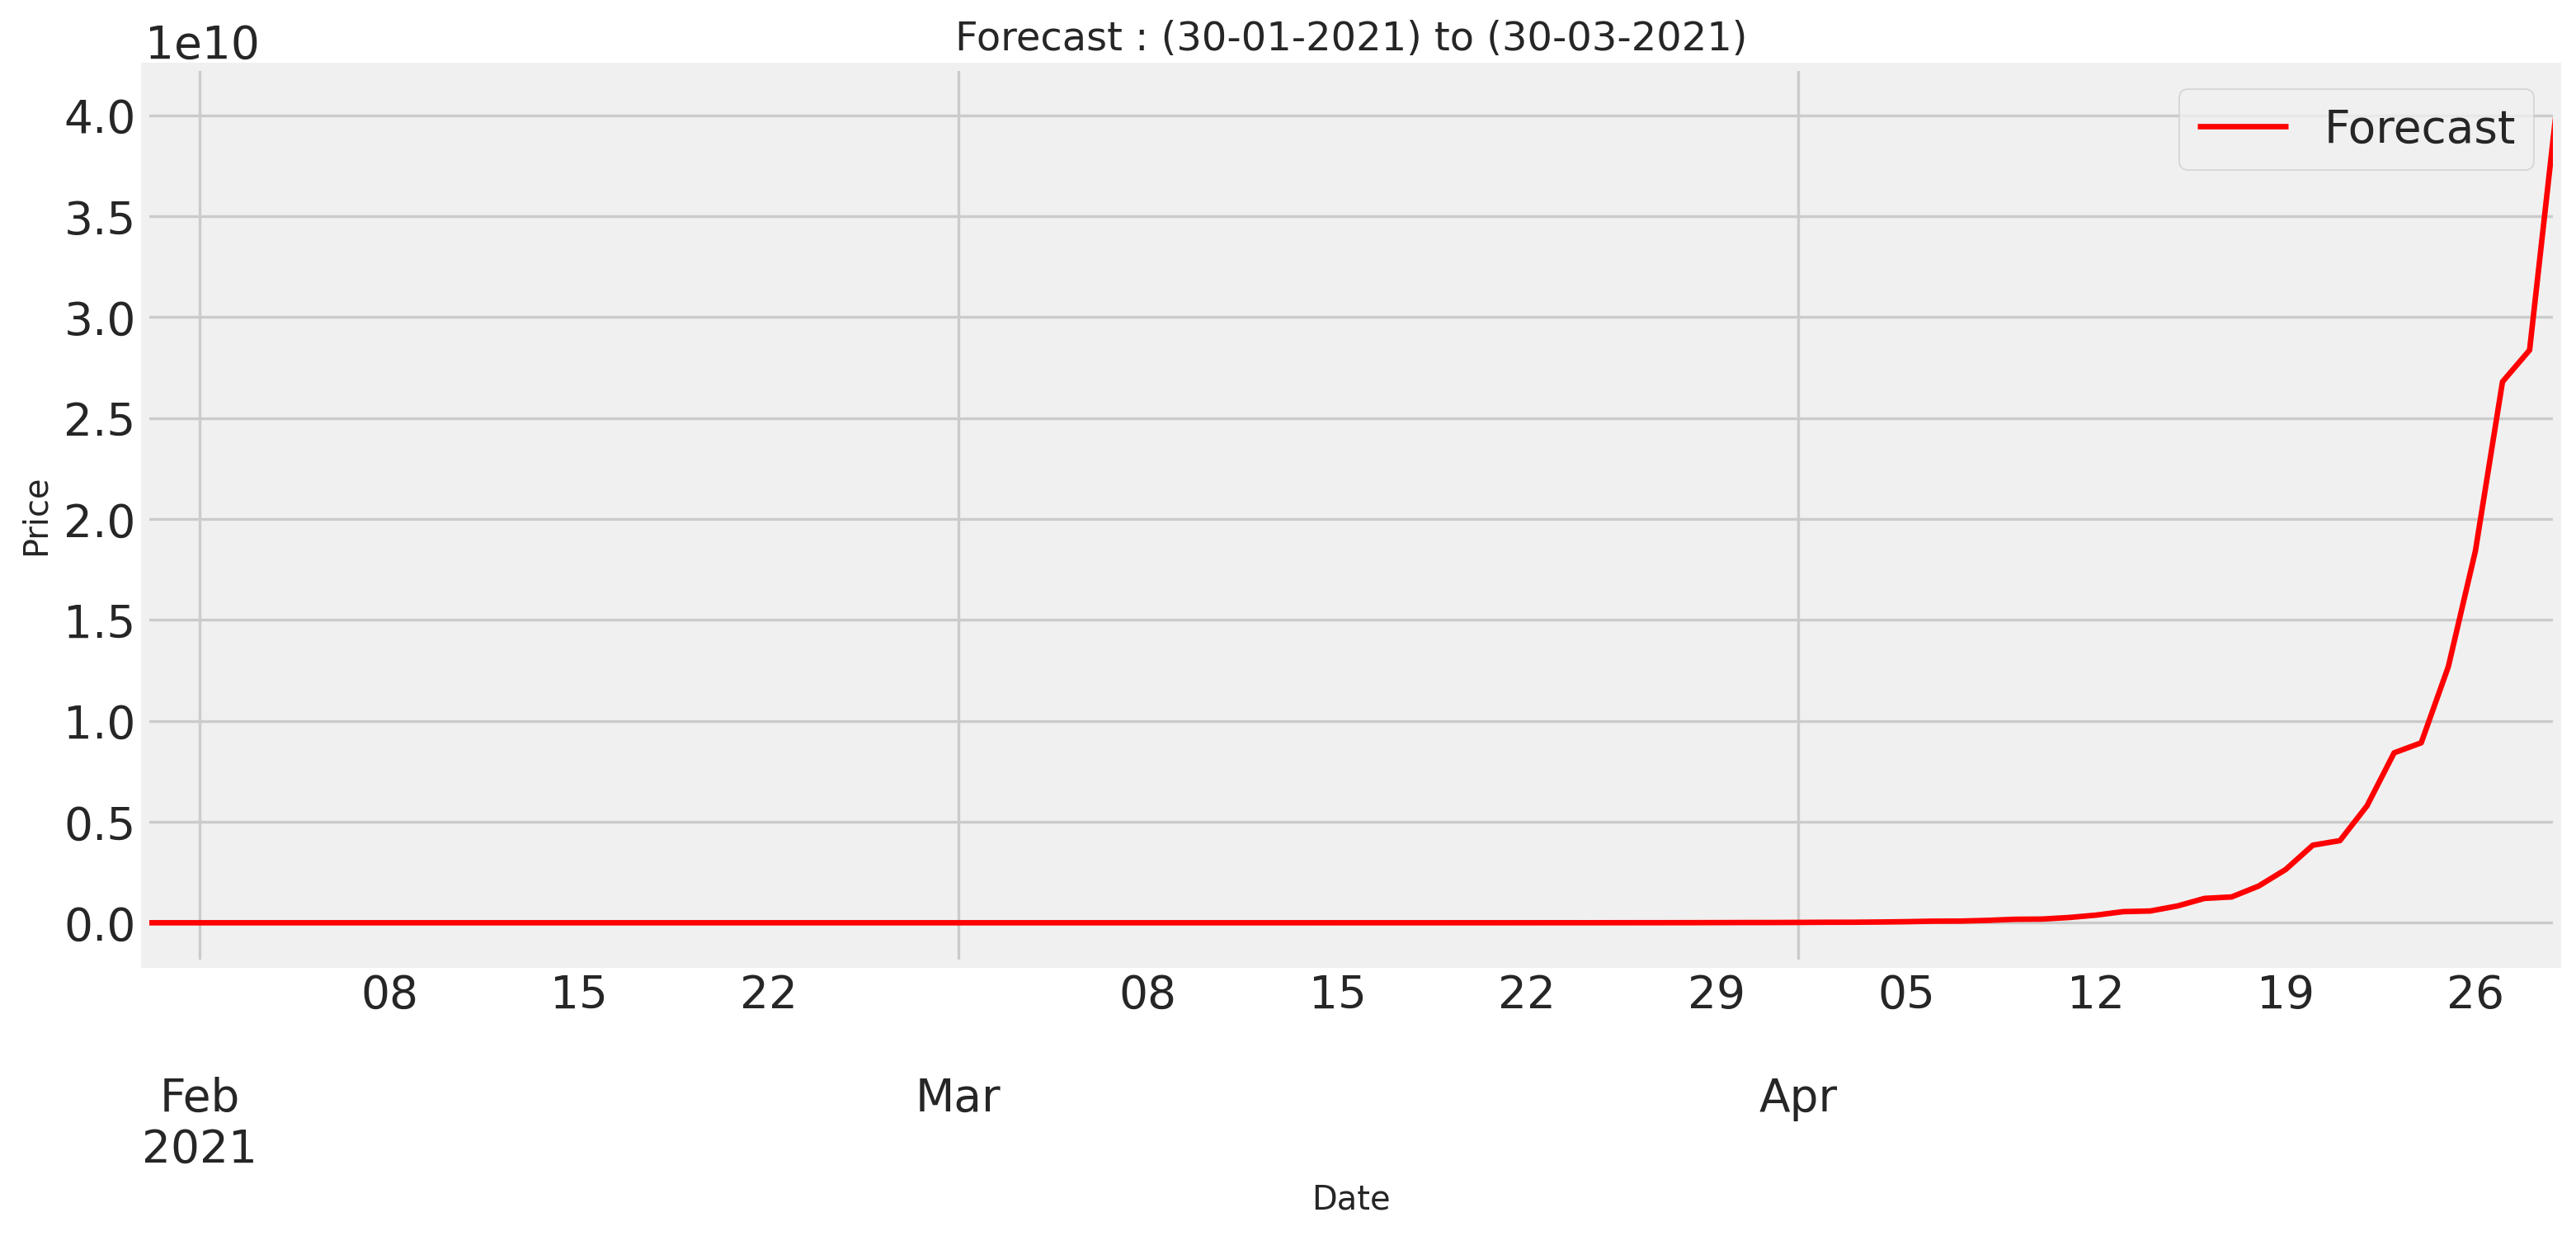

In [82]:
fig = plt.figure(dpi=120,figsize = (14,6))
ax = plt.axes()
ax.set(xlabel = 'Date',ylabel = 'Price',title = 'Forecast : (30-01-2021) to (30-03-2021)')
forecast_RNN.plot(label = 'Forecast',ax=ax,color='red',lw=2);

**The RMSE scores of each of the appiled models as follow:**

- ARIMA(2,1,1): RMSE Score 25.83997931
- FaceBook Prophet: RMSE Score 7.461
- Recurrent Neural Network (LSTM Model): RMSE Score 0.025

#### In conclusion, RNN model predicts better than the other models; and, the closing stock price of Microsoft Market is expected to experience dramatic drops in the coming three months.